<a href="https://colab.research.google.com/github/alexhosp/startup-viability-analysis/blob/main/customer-segmentation/notebooks/02_google_trends_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Trends: Data Analysis
## Introduction
This notebook analyzes Google Search trends for keywords related to our proposed prototype features as well as problems and user needs addressed by the prototype. By identifying the most relevant keywords and observing how interest in these keywords has changed over the last three years, we can gather insights that will guide future customer segmentation analyis.

## Contents
Contents
1. [Data Overview](#data-overview)
  1. [Loading Data from GCS](#loading-data)
  2. [Description of Loaded Data](#description-of-available-data)
  3. [Brief Evaluation of Keywords with No Interest](#data-no-interest)
2. [Key Features Analysis](#key-features-analysis)
  1. [Definition of Most Relevant Features](#most-relevant-features)
  2. [Detailed Trend Analysis of Key Features](#key-features-trend-analysis)
    1. [Moderate Interest Features](#trends-moderate-features)
    2. [High Interest Features](#trends-high-features)
    3. [Critical Interest Features](#trends-critical-features)
  3. [Visualizations: Interest Over Time for Key Features](#features-visualizations)
    1. [Moderate Interest Features](#features-moderate-visualizations)
    2. [High Interest Features](#features-high-visualizations)
    3. [Critical Interest Features](#features-critical-visualizations)
3. [Key Problems Analysis](#key-problems-analysis)
  1. [Definition of Most Relevant Problems](#most-relevant-problems)
  2. [Detailed Trend Analysis of Key Problems](#key-problems-trend-analysis)
    1. [Critical Interest Problems](#trends-critical-problems)
  3. [Visualizations: Interest Over Time for Key Problems](#problems-visualizations)
    1. [Critical Interest Problems](#problems-critical-visualizations)
4. [Key Needs Analysis](#key-needs-analysis)
  1. [Definition of Most Relevant Needs](#most-relevant-needs)
  2. [Detailed Trend Analysis of Key Needs](#key-needs-trend-analysis)
    1. [Moderate Interest Needs](#trends-moderate-needs)
    2. [High Interest Needs](#trends-high-needs)
    3. [Critical Interest Needs](#trends-critical-needs)
  3. [Visualizations: Interest Over Time for Key Needs](#needs-visualizations)
    1. [Moderate Interest Needs](#visualizations-moderate-needs)
    2. [High Interest Needs](#visualizations-high-needs)
    3. [Critical Interest Needs](#visualizations-critical-needs)
5. [Contextual Exploration of Most Relevant Keywords](#contextual-exploration)
  1. [Summary Table: Most Relevant Keywords](#most-relevant-keywords)
  2. [Exploration of Interest Context](#categories)
6. [Presentation of Results and Insights](#presentation-of-results)
  1. [Keyword Performance Results](#keyword-performance)
  2. [Interest Trend Analysis Results](#interest-trends)
  3. Contextual Exploration Insights
  4. Visualization of Key Insights
7. Conclusion
  1. Summary of Key Insights
  2. Relevance for Further Analysis
  3. Relevance for Market Understanding
  4. Relevance for Prototype Development
8. Next Steps
  1. Future Analysis Plan

<a name='data-overview'></a>
## Data Overview
* Load data from GCS.
* Describe structure, format and contents of data.
* Evaluate keywords that did not receive interest and will not be included in the analysis.


<a name='loading-data'></a>
## Loading Data from GCS
* Import necessary libraries
* Authenticate and access GCS
* Load data from storage bucket

In [ ]:
# Import necessary libraries
from google.cloud import storage
import pandas as pd
from google.colab import auth

In [ ]:
# Authenticate with GCP
auth.authenticate_user()


In [ ]:
# Set up GCS client
project_id = 'idyllic-gear-422709-g4'
storage_client = storage.Client(project=project_id)

In [ ]:
# Define storage location
bucket_name = 'startup-viability-analysis'
bucket = storage_client.get_bucket(bucket_name)
bucket

<Bucket: startup-viability-analysis>

In [ ]:
# Define sub-folder name
base_path = 'google_trends/'

In [ ]:
# Define function to load parquet files from GCS
def load_parquet(bucket, file_path):
  """
  Load a Parquet file from a Google Cloud Storage bucket into a pandas DataFrame.

  Args:
      bucket (google.cloud.storage.bucket.Bucket): The Google Cloud Storage bucket object.
      file_path (str): The path to the Parquet file within the GCS bucket.

  Returns:
      pd.DataFrame: The loaded data as a pandas DataFrame.

  Example:
      df = load_parquet_from_gcs(bucket, 'path/to/your/file.parquet')
  """
  # Create a Blob object for the specified file path within the bucket
  blob = bucket.blob(file_path)

  # Open the blob as a file object and read it into a pandas DataFrame
  with blob.open("rb") as f:
      df = pd.read_parquet(f)
  return df

### Load Data for Keywords with No Relevance

In [ ]:
# Load dataframe with features with no interest
zero_relevance_features = load_parquet(bucket, base_path + 'zero_interest_features.parquet')
zero_relevance_features.head(2)

,zero_interest_keywords
0,Versatile for various agricultural needs
1,Organic gardening helper


In [ ]:
# Load dataframe with problems with no interest (relevance)
zero_relevance_problems = load_parquet(bucket, base_path + 'zero_relevance_problems.parquet')
zero_relevance_problems.head(2)

,zero_interest_keywords
0,Limited adaptability of automated gardening systems
1,Underutilization of natural biodiversity


In [ ]:
# Load dataframe with needs with no interest (relevance)
zero_relevance_needs = load_parquet(bucket, base_path + 'zero_relevance_needs.parquet')
zero_relevance_needs.head(2)

,zero_interest_keywords
0,Bridge gap between humans and nature
1,Simple set-up gardening solution


### Load Data for Keywords Sorted by Relevance

In [ ]:
# Load features by interest dataframe
features_by_interest = load_parquet(bucket, base_path + 'features_by_interest.parquet')
features_by_interest.head(2)

,interest,weekly_average_interest
Solar powered,11745,75.086
Plant detection,10079,64.435


In [ ]:
# Load problems by relevance dataframe
problems_by_relevance = load_parquet(bucket, base_path + 'problems_by_relevance.parquet')
problems_by_relevance.head(2)

,interest,weekly_average_interest
Monoculture in agriculture,2397,15.324
Separation of food production from natural ecosystems,158,1.010


In [ ]:
# Load needs by relevance dataframe
needs_by_relevance = load_parquet(bucket, base_path + 'needs_by_relevance.parquet')
needs_by_relevance.head(2)

,interest,weekly_average_interest
Climate resilience,8776,56.105
Educational AI,4612,29.485


### Load Data For Keywords Interest Over Time

In [ ]:
# Load data for features interest over time
features_interest_over_time = load_parquet(bucket, base_path + 'features_interest_over_time.parquet')
features_interest_over_time.tail(2)

,Computer vision for environmental understanding,Real-time monitoring sensors,Raspberry Pi processing for community engagement,Hexapod mobility and agility,Portable agricultural technology,Ecosystem health classification,Educational information on plants and environments,Modular plug-and-play design for sensors and tools,Real-time environment monitoring,Plant detection,...,Adaptive algorithms for environmental conditions,Support for local biodiversity,Resource-efficient plant growth with minimal external inputs,Energy-efficient with solar charging for outdoor use,Remote access and control,AI-driven recommendations for food system health,AI-driven recommendations,Food system health,Plant identification,Automated gardening
date,,,,,,,,,,,,,,,,,,,,,
2024-06-16,0,35,0,0,0,0,0,0,2,57,...,0,3,0,0,47,0,0,10,56,0
2024-06-23,0,36,0,0,0,1,0,0,2,63,...,0,3,0,0,58,0,1,11,53,0


In [ ]:
# Load data for problems relevance over time
problems_relevance_over_time = load_parquet(bucket, base_path + 'problems_relevance_over_time.parquet')
problems_relevance_over_time.tail(2)

,Lack of portability in automated farming,No biological understanding in gardening automation,Monoculture in agriculture,Long-distance food transport,Disconnect between people and food sources,Use of preservatives and pesticides in produce,Separation of food production from natural ecosystems,Lack of ecosystem integration in automated food production,Lack of natural environment in agricultural innovation,Inaccessibility of personal gardening automation,...,Lack of agricultural AI for natural ecosystems,High costs of automated farming solutions,Limited adaptability of automated gardening systems,Complex setup of automated gardening solutions,Environmental impact of commercial farming solutions,Lack of integrated ecosystem management in farming systems,Focus on single crops in agriculture innovation,Underutilization of natural biodiversity,Unstable farming systems through conventional practices,Lack of data on the natural environment
date,,,,,,,,,,,,,,,,,,,,,
2024-06-16,0,0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-06-23,0,0,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
# Load data for needs relevance over time
needs_relevance_over_time = load_parquet(bucket, base_path + 'needs_interest_over_time.parquet')
needs_relevance_over_time.tail(2)

,Sustainable food production,Natural and organic growing methods,Personal involvement in food growing,Efficient and localized agriculture,Educational AI,Robotics for Ecosystem Health,User-friendly gardening automation,Versatile farming solutions for different environments,Real-time environmental data for planting,Portable and easy-to-use agricultural technology,...,Access and interpret environmental data,Reduce food waste with optimized conditions,Community engagement in ecosystems and food,Nutritious and pesticide-free food,Food security with adaptable automated agriculture,Improved relationship with food,Collect data on nature,Enhanced crop yield prediction,Climate resilience,Biodiversity preservation
date,,,,,,,,,,,,,,,,,,,,,
2024-06-16,21,0,0,0,72,0,0,0,0,0,...,0,0,0,0,0,1,2,0,80,4
2024-06-23,25,1,0,0,78,0,0,0,0,0,...,0,0,0,0,0,1,2,0,88,5


<a name='description-of-available-data'></a>
## Description of Loaded Data
* Describe metrics used by Google Trends
* Describe the format of the data
* Describe the structure of the data
* Describe the contents of the data

#### Understanding Google Trends Metrics:
Google Trends data is sampled and rated on a scale from 1 to 100, with 100 representing the highest search interest for the selected time and location. This data is normalized to reflect the percentage of searches for a specific term relative to the total number of searches at that time and location, rather than showing the absolute number of searches. This approach provides a relative measure of interest, indicating how popular a search term is compared to overall search volume in the given context. I evaluated searches worldwide over a period of 3 years.

[More information](https://newsinitiative.withgoogle.com/resources/trainings/google-trends/basics-of-google-trends/#:~:text=Understanding%20the%20numbers,-By%20now%2C%20we&text=Indexing%3A%20Google%20Trends%20data%20is,the%20time%20and%20location%20selected.)


### Data Format
All data is stored in the `google_trends` subfolder in Google Cloud Storage (GCS) as Parquet files. These files were loaded into the notebook using a function that reads them into pandas DataFrames.



### Data Structure and Contents
The dataset comprises three different data structures: keywords with no relevance, keywords sorted by overall relevance, and keywords sorted by time. Each structure is consistently formatted across features, problems, and needs.


#### Structure 1: Keywords with No Relevance
##### Description:
* The dataframes `zero_relevance_features`, `zero_relevance_problems`, and `zero_relevance_needs` share this structure.
* These dataframes contain keywords that received no significant search interest over the last three years.

##### Index:
The dataframe uses a sequential numerical index.
##### Columns:

- `zero_interest_keywords`: Contains the keyword as searched with the Google Trends API. The datatype is a string.

##### Example Data:

In [ ]:
# Example data for feature keywords with no relevane
zero_relevance_features.head(3)

,zero_interest_keywords
0,Versatile for various agricultural needs
1,Organic gardening helper
2,Hexapod mobility and agility


In [ ]:
# Example data for problems keywords with no relevance
zero_relevance_problems.head(3)

,zero_interest_keywords
0,Limited adaptability of automated gardening systems
1,Underutilization of natural biodiversity
2,Lack of integrated ecosystem management in farming systems


In [ ]:
# Example data for needs problems with zero interest
zero_relevance_needs.head(3)

,zero_interest_keywords
0,Bridge gap between humans and nature
1,Simple set-up gardening solution
2,Real-time feedback on ecosystem health


#### Structure 2: Keywords by Relevance
##### Description:
* The dataframes `features_by_interest`, `problems_by_relevance`, and `needs_by_relevance` share this structure.
* These dataframes contain keywords with substantial interest, sorted in descending order by aggregated interest over the last 3 years.
* The dataframe contains no null-values.

##### Index:
The dataframe uses the keywords as the index.
##### Columns:

- `interest`: Interest collected in weekly intervals over three years summed up. The datatype is an int64.
- `weekly_average_interest`: Average weekly interest over the 3-year period, scaled from 1 to 100. This column provides a measure of relative interest similar to the one used by Google Trends, but it represents the average over the entire time period. Rounded to 3 decimals. The datatype is a float64.

##### Example Data:

In [ ]:
# Example data for features sorted by relevance
features_by_interest.head(3)

,interest,weekly_average_interest
Solar powered,11745,75.086
Plant detection,10079,64.435
Educational value,8770,56.067


In [ ]:
# Example data for problems sorted by relevance
problems_by_relevance.head(3)

,interest,weekly_average_interest
Monoculture in agriculture,2397,15.324
Separation of food production from natural ecosystems,158,1.010
Lack of understanding of the natural world,108,0.690


In [ ]:
# Example data for needs sorted by relevance
needs_by_relevance.head(3)

,interest,weekly_average_interest
Climate resilience,8776,56.105
Educational AI,4612,29.485
Sustainable food production,3989,25.502


#### Structure 3: Keywords by Weekly Interest
##### Description:
* The dataframes `features_interest_over_time`, `problems_relevance_over_time` and `needs_relevance_over_time` share this structure.
* These dataframes contain the weekly interest for each keyword over a period of 3 years, with interest aggregated in weekly intervals by Google Trends.
* The dataframes contains no empty columns.

##### Index:
The dataframe uses the date as an index, representing weekly intervals.
##### Columns:
Each column name represents a keyword for which interest is collected weekly over a period of 3 years.

##### Example Data:

In [ ]:
# Example data for interest over time in features
features_interest_over_time.head(3)

,Computer vision for environmental understanding,Real-time monitoring sensors,Raspberry Pi processing for community engagement,Hexapod mobility and agility,Portable agricultural technology,Ecosystem health classification,Educational information on plants and environments,Modular plug-and-play design for sensors and tools,Real-time environment monitoring,Plant detection,...,Adaptive algorithms for environmental conditions,Support for local biodiversity,Resource-efficient plant growth with minimal external inputs,Energy-efficient with solar charging for outdoor use,Remote access and control,AI-driven recommendations for food system health,AI-driven recommendations,Food system health,Plant identification,Automated gardening
date,,,,,,,,,,,,,,,,,,,,,
2021-06-27,0,0,0,0,0,0,0,0,0,34,...,0,0,0,0,0,0,0,7,86,0
2021-07-04,0,0,0,0,0,0,0,0,0,34,...,0,0,0,0,32,0,0,6,97,0
2021-07-11,0,0,0,0,0,0,0,0,0,33,...,0,0,0,0,29,0,0,7,92,0


In [ ]:
# Example data for relevance over time of problems
problems_relevance_over_time.head(3)

,Lack of portability in automated farming,No biological understanding in gardening automation,Monoculture in agriculture,Long-distance food transport,Disconnect between people and food sources,Use of preservatives and pesticides in produce,Separation of food production from natural ecosystems,Lack of ecosystem integration in automated food production,Lack of natural environment in agricultural innovation,Inaccessibility of personal gardening automation,...,Lack of agricultural AI for natural ecosystems,High costs of automated farming solutions,Limited adaptability of automated gardening systems,Complex setup of automated gardening solutions,Environmental impact of commercial farming solutions,Lack of integrated ecosystem management in farming systems,Focus on single crops in agriculture innovation,Underutilization of natural biodiversity,Unstable farming systems through conventional practices,Lack of data on the natural environment
date,,,,,,,,,,,,,,,,,,,,,
2021-06-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-07-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-07-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Example data for relevance over time of needs
needs_relevance_over_time.tail(3)

,Sustainable food production,Natural and organic growing methods,Personal involvement in food growing,Efficient and localized agriculture,Educational AI,Robotics for Ecosystem Health,User-friendly gardening automation,Versatile farming solutions for different environments,Real-time environmental data for planting,Portable and easy-to-use agricultural technology,...,Access and interpret environmental data,Reduce food waste with optimized conditions,Community engagement in ecosystems and food,Nutritious and pesticide-free food,Food security with adaptable automated agriculture,Improved relationship with food,Collect data on nature,Enhanced crop yield prediction,Climate resilience,Biodiversity preservation
date,,,,,,,,,,,,,,,,,,,,,
2024-06-09,28,0,0,0,68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80,10
2024-06-16,21,0,0,0,72,0,0,0,0,0,...,0,0,0,0,0,1,2,0,80,4
2024-06-23,25,1,0,0,78,0,0,0,0,0,...,0,0,0,0,0,1,2,0,88,5


<a name='data-no-interest'></a>
## Brief Evaluation of Keywords with No Relevance
- Explore the dataframes containing keywords that received no significant search interest over the last three years.
- Analyze a sample of keywords to determine if the lack of interest is due to the concepts they represent or if the keywords were not chosen well.
- Assess the overall number of keywords that received no interest.


### Assessing Keywords Representing Proposed Features
- Use Google Trends to check if there are related queries that are more popular

In [ ]:
zero_relevance_features

,zero_interest_keywords
0,Versatile for various agricultural needs
1,Organic gardening helper
2,Hexapod mobility and agility
3,Educational information on plants and environments
4,Beneficial ecosystem modeling
5,Ecosystem risk detection
6,User-friendly setup and control
7,Energy-efficient with solar charging for outdoor use
8,Resource-efficient plant growth with minimal external inputs
9,Real-time response to environmental changes


Observations:
* All keywords in the list consist of more than 3 words.
* Many keywords use complex technical jargon ('hexapod mobility and agility', 'beneficial ecosystem modelling'..)
* Some keywords are highly specific, or niche keywords ('adaptive algorithms for environmental conditions')

#### Identify Alternative Keywords with Similar Meanings
* Use the `pytrends.suggestions` to find related search suggestions that could phrase ideas more simply and generally.
* Identify keywords with similar meaning that yield higher search volumes.

**Initialize the Pytrends API**

In [ ]:
# Install and import necessary libraries
!pip install pytrends
!pip install urllib3==1.25.11
from pytrends.request import TrendReq

In [ ]:
# Initialize the Pytrends object
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Connection': 'keep-alive',
    'Referer': 'https://www.google.com'
}

pytrends = TrendReq(hl='en-US', tz=360, retries=3, requests_args={'headers': headers})

# Define the timeframe (same as all data previously collected)
timeframe = '2021-06-21 2024-06-23'

**Create a list of keywords that with zero interest**

In [ ]:
# Show number of features keywords with zero interest
keywords = zero_relevance_features['zero_interest_keywords'].tolist()
len(keywords)

20

In [ ]:
# Initialize an empty list to store the DataFrames
suggestions_list = []

In [ ]:
# Loop through list of keywords
for keyword in keywords:
    # Get suggestions for the keyword
    suggestions = pd.DataFrame(pytrends.suggestions(keyword))

    # Drop the 'mid' column
    if 'mid' in suggestions.columns:
      suggestions.drop(columns=['mid'], inplace=True)

    # Add a column for the original keyword
    suggestions['keyword'] = keyword

    # Append the DataFrame to the list
    suggestions_list.append(suggestions)

**Analyze Alternative Keywords for 'Versatile for various agricultural needs'**

In [ ]:
# Return the search first term in the list
suggestions_list[0]['keyword'][0]

'Versatile for various agricultural needs'

In [ ]:
# Return the suggested searches and evaluate briefly
suggestions_list[0]

,title,type,keyword
0,Exploring the Skies: A Comprehensive Guide to Drone Technology,Topic,Versatile for various agricultural needs
1,Exploring the Skies: A Comprehensive Guide to Drone Technology,Topic,Versatile for various agricultural needs
2,Exploring the Skies: A Comprehensive Guide to Drone Technology,Topic,Versatile for various agricultural needs
3,Exploring the Skies: A Comprehensive Guide to Drone Technology,Topic,Versatile for various agricultural needs
4,Vetsark,Topic,Versatile for various agricultural needs


**Interpretation of Results: 'Versatile for various agricultural needs'**

**Observation:**

A topic associated with the feature 'versatile for various agricultural needs' is drone technology. Additionally, Vetsark, a technology company focused on improving animal health and agriculture through digital solutions, also appears. The same suggestion 'Exploring the Skies...' appears four times in the results, which indicates extremely limited data for this keyword.

**Conclusion**

This interest is addressed by some farming technologies. However, the feature described by the keyword seems to be a **niche interest**. The same suggestion, a drone guide, appears several times. The related keywords suggested do not offer any clearer alternatives for this search term.

**Analyze Alternative Keywords for 'Organic gardening helper'**

In [ ]:
# Briefly evaluating the next search term
suggestions_list[1]
# Return the search term
suggestions_list[1]['keyword'][0]

'Organic gardening helper'

In [ ]:
# Return suggested terms for this keyword
suggestions_list[1]

,title,type,keyword
0,The Harvest Helper: Organic Gardening for Vege...,Topic,Organic gardening helper
1,The Harvest Helper: Organic Gardening for Vege...,Book by Kathleen B. deMaCarty,Organic gardening helper
2,"Almicanna, Indoor gardening equipment, Crop Mi...",Topic,Organic gardening helper
3,Om Vasudhare 3.5x3.5cm 10 Cell Paper Pulp Seed...,Topic,Organic gardening helper
4,jijAcraft 4-ply Natural Strong Jute String Thi...,Topic,Organic gardening helper


**Interpretation of Results: 'Organic gardening helper'**

**Observation:**
Suggested terms for 'Organic gardening helper' include 'The Harvest Helper', a book about organic gardening, indoor gardening equipment, and various gardening supplies like paper pulp seed trays and jute string for training plants. None of these is related to robotic technology. One suggestion appears twice, indicating very limited data on this keyword.

**Conclusion:**

The suggested terms for "organic gardening helper" primarily relate to traditional gardening tools, books, and supplies. This suggests that the term is not strongly associated with technological solutions like the proposed robotic gardening assistant. While there is some interest in organic gardening help, the current phrasing doesn't effectively capture the potential market for a high-tech gardening tool. The related keyword suggestions don't provide useful alternatives for the keyword 'Organic gardening helper'. Keywords that address the technological aspect more might be better fit (such as 'robotic gardening assistant').

**Analyze Alternative Keywords for 'Hexapod mobility and agility'**

In [ ]:
suggestions_list[2]['keyword'][0]

'Hexapod mobility and agility'

In [ ]:
suggestions_list[2]

,title,type,keyword
0,Control of the Stiffness of Robotic Appendages...,Topic,Hexapod mobility and agility


**Interpretation of Results: 'Hexapod mobility and agility'**

**Observation:**
The only suggested topic for 'Hexapod mobility and agility' is a scientific paper titled "Control of the Stiffness of Robotic Appendages." This indicates a narrow interest primarily within the scientific and robotics communities.

**Conclusion:**

The limited results suggest that 'Hexapod mobility and agility' is a niche interest with low general appeal. The suggestions do not offer alternative, more effective, phrases. Splitting the keyword into simpler terms like 'hexapod', 'mobility', and 'agility' could improve its effectiveness and broaden the potential audience.

#### Conclusion
* The sample of 3 keywords that received no search interest, don't have strong alternative keywords that could increase their effectiveness.
* Keywords chosen are often niche intersts, too specific or too technical.
* A good next step is to evaluate the suggestions provided by Pytrends and analyze which niches keywords appeal to and then reduce their complexity, by splitting and rephrasing.

#### Hypothesis: The more words in a keyword, the lower the search interest.
* It can be observed that all keywords that received no interest consist of 3 or more words.
* Analyze if the word count in keywords affects interst levels.


In [ ]:
# Return full list of keywords with no interst for the features
zero_relevance_features

,zero_interest_keywords
0,Versatile for various agricultural needs
1,Organic gardening helper
2,Hexapod mobility and agility
3,Educational information on plants and environm...
4,Beneficial ecosystem modeling
5,Ecosystem risk detection
6,User-friendly setup and control
7,Energy-efficient with solar charging for outdo...
8,Resource-efficient plant growth with minimal e...
9,Real-time response to environmental changes


**Observation:**

All keywords in the *features* group with zero search interest contain more than three words.

Check keywords with no interest for the other areas
* Inspect keywords in the problems group that received no interest.
* Inspect keywords in the needs group that received no interest.

In [ ]:
# Return all problems with zero relevance
zero_relevance_problems

,zero_interest_keywords
0,Limited adaptability of automated gardening sy...
1,Underutilization of natural biodiversity
2,Lack of integrated ecosystem management in far...
3,Environmental impact of commercial farming sol...
4,Unstable farming systems through conventional ...
5,Complex setup of automated gardening solutions
6,Lack of portability in automated farming
7,Lack of agricultural AI for natural ecosystems
8,Inability to create self-sufficient ecosystems...
9,No biological understanding in gardening autom...


**Observation:**

All keywords in the *problems* group with zero search interest contain more than three words.

In [ ]:
# Return all needs with zero relevance
zero_relevance_needs

,zero_interest_keywords
0,Bridge gap between humans and nature
1,Simple set-up gardening solution
2,Real-time feedback on ecosystem health
3,Utilize local biodiversity for food systems
4,Access and interpret environmental data
5,Reduce food waste with optimized conditions
6,Ecosystem-aware agricultural technology
7,Portable and easy-to-use agricultural technology
8,Real-time environmental data for planting


**Observation:**

All keywords in the *needs* group with zero search interest contain more than four words.

**Compare successful keywords in the *features* group**

In [ ]:
# Compare successful keywords
features_by_interest.head()

,interest,weekly_average_interest
Solar powered,11745,75.086
Plant detection,10079,64.435
Educational value,8770,56.067
Plant identification,8530,54.533
Remote access and control,7605,48.619


**Observation:**

The top four keywords with the highest interest are all two-word phrases. However, the fifth keyword, 'Remote access and control', consisting of four words, still demonstrates significant interest.

**Conclusion:**

While the number of words in a keyword can influence its search interest, it's not the sole determining factor. Other factors, such as the keyword's relevance to current trends and its specificity, also play a role in driving interest. This suggests that a combination of conciseness and relevance is key to maximizing search interest.

**Compare successful keywords in the *problems* group**

In [ ]:
# Check the other areas of interest
problems_by_relevance.head()

,interest,weekly_average_interest
Monoculture in agriculture,2397,15.324
Separation of food production from natural ecosystems,158,1.010
Lack of understanding of the natural world,108,0.690
High costs of automated farming solutions,100,0.639
Focus on single crops in agriculture innovation,100,0.639


**Observation:**
The keyword with the highest interest, 'Monoculture in agriculture',consists of three words and has significantly higher weekly average interest (15) compared to the other keywords, which all have six or more words and weekly average interest between 0.5 and 1.

**Conclusion:**

The data suggests a potential negative correlation between the number of words in a keyword and the level of search interest. Keywords with fewer words, receive significantly higher interest compared to longer, more complex phrases.

**Compare successful keywords in the *needs* group**

In [ ]:
needs_by_relevance.head(7)

,interest,weekly_average_interest
Climate resilience,8776,56.105
Educational AI,4612,29.485
Sustainable food production,3989,25.502
Biodiversity preservation,877,5.607
Robotics for Ecosystem Health,279,1.784
Scalable automated gardening system,210,1.343
Food security with adaptable automated agriculture,187,1.195


**Observation:**

The keyword with the highest interest, "Climate resilience," consists of two words. Keywords with three words ("Educational AI," "Sustainable food production") have moderately lower interest, while those with four or more words show significantly less weekly average interest.

**Conclusion:**

The data suggests a potential negative correlation between the number of words in a keyword and the level of search interest. Keywords with fewer words tend to garner higher interest compared to longer, more complex phrases. While exceptions exist due to other factors influencing interest, the overall pattern supports the idea that shorter keywords are generally more likely to attract attention.

#### Conclusion:
The data analyzed across all keyword groups demonstrates that shorter keywords tend to generate higher search interest compared to longer, more complex phrases. While other factors like relevance and specificity also influence interest, reducing the word count of low-performing keywords is a good first step to improve their effectiveness.

<a name='key-features-analysis'></a>
## Key Features Analysis
- Show and evaluate the proposed features that are most relevant to potential customers.
- Analyze trends, fluctuations, and consistency in interest for most relevant features.
- Visualize and evaluate interest over time for the key features.

<a name='most-relevant-features'></a>
### Determine Features with Highest Relevance
- Present features sorted by their relevance.
- Determine features with significant relevance.
- Establish thresholds to classify features into the following categories:
  - Critical: Essential and highly relevant features.
    - Average weekly interest 75% - 100%
  - High: Very important and significantly relevant features.
    - Average weekly interest: 50% - 75%
  - Moderate: Important but not essential features.
    - Average weekly interest: 10% - 50%
  - Low: Somewhat relevant but not crucial features.
    - Average weekly interest: 0% - 10%
- These values are relative to the highest weekly average interest value in the dataset.

In [ ]:
# Show proposed feature keywords by relevance table
features_by_interest.head(3)

,interest,weekly_average_interest
Solar powered,11745,75.086
Plant detection,10079,64.435
Educational value,8770,56.067


In [ ]:
# Define a function to compute each keyword's relative interest (compared to the highest interest) and classify them into relevance levels.

def get_relative_interest(df):
    """
    Calculate the relative interest of each row in relation to the highest interest row,
    and categorize them into relevance levels.

    Parameters:
    df (pd.DataFrame): A DataFrame containing a 'weekly_average_interest' column.

    Returns:
    pd.DataFrame: The input DataFrame with two additional columns:
                  'relative_interest' - the interest as a percentage of the maximum interest,
                  'relevance' - a categorical column indicating the level of interest:
                                'Low', 'Moderate', 'High', or 'Critical'.
    """
    # Get the highest average weekly interest
    max_interest = df['weekly_average_interest'].max()

    # Add a column with the relative interest as a percentage for each datapoint
    df['relative_interest'] = (df['weekly_average_interest'] / max_interest * 100).round().astype(int)

    # Define edges for the four bins
    bin_edges = [-0.001, 10, 50, 75, 100]

    # Define labels for the four bins
    labels = ['Low', 'Moderate', 'High', 'Critical']

    # Create a new categorical column with relevance categories
    df['relevance'] = pd.cut(df['relative_interest'], bins=bin_edges, labels=labels, include_lowest=True)

    # Drop the intermediate 'relative_interest' column
    df.drop(columns=['relative_interest'], inplace=True)

    return df

In [ ]:
# Classify feature keyword into interest categories
features_by_interest = get_relative_interest(features_by_interest)
features_by_interest.head(3)

,interest,weekly_average_interest,relevance
Solar powered,11745,75.086,Critical
Plant detection,10079,64.435,Critical
Educational value,8770,56.067,High


In [ ]:
# Show data in the last bin as a percentage
total_features = len(features_by_interest)
low_interest_features = len(features_by_interest[features_by_interest['relevance'] == 'Low'])

low_relevance = (low_interest_features / total_features) * 100
print(f"Percentage of features in the 'Low' category: {round(low_relevance)}%")

Percentage of features in the 'Low' category: 80%


### Conclusion
- 80% of Proposed Features Have Low Relevance:
  - These features have an average weekly interest below 10%.
  - These features should not be considered for the prototype.
- Moderate Relevance:
  - One proposed feature, 'Food System Health', has moderate relevance.
  - Patterns in interest  should be further analyzed to determine if interest is rising.
- High Relevance:
  - Three features have high relevance:
      - 'Educational Value'
      - 'Plant Identification'
      - 'Remote Access and Control'
  - Patterns and context of interest in these features need to be analyzed. These features are likely to attract customers and are valuable for future analysis.
- Critical Relevance:
  - Two proposed features have critical relevance:
    - 'Solar Powered'
    - 'Plant Detection'
  - Patterns and context of interest needs to be analyzed in detail. These features have a strong customer base and are essential for customer segmentation analysis, market analysis, and competitor analysis. They are also candidates for inclusion in the first prototype (MVP).

<a name='key-features-trend-analysis'></a>
## Detailed Trend Analysis of Key Features
- Analyze trends in interest for features with moderate to critical relevance
  - Calculate and interpret summary statistics
    - Count
    - Mean
    - Standard Deviations
    - Minimum Interest
    - Maximum Interest
    - Quartiles
    - Variance (inferred)
  - Identify Trends
    - Determine if interest over the last 3 years is increasing, decreasing or stable.
    - Determine peaks and troughts in interest.
    - Determine if interest is currently rising or falling.
- Interpret analysis results

### Trend Analyis
- Analyze trends in interest for features with moderate, high and critical interest.

<a name='trends-moderate-features'></a>
#### Trend Analysis for Features with Moderate Interest
- Assess whether interest has been increasing, decreasing, or stable over the past 3 years.
- Identify the peaks and troughs in interest levels.
- Determine the current trend in interest, whether it is rising or falling.

**Summary Statistics**
* Evaluate summary statistics to get an overview of the data's characteristics.


In [ ]:
# Show features with moderate interest
features_by_interest[features_by_interest['relevance'] == 'Moderate']

,interest,weekly_average_interest,relevance
Food system health,2304,14.73,Moderate


In [ ]:
# Define a function that returns columns in the features_interest_over_time dataframe by interest level in the features_by_relevance dataframe

def get_relevant_keywords_df(features_by_interest, features_interest_over_time, relevance_level):
    """
    Returns a DataFrame with the relevant columns for a specified relevance level.

    Parameters:
    features_by_interest (pd.DataFrame): DataFrame containing feature relevance information with 'relevance' column.
    features_interest_over_time (pd.DataFrame): DataFrame containing weekly interest data for features.
    relevance_level (str): The relevance level to filter by.

    Returns:
    pd.DataFrame: DataFrame with the relevant columns in features_interest_over_time.
    """
    # Create a list of features with the specified relevance level
    relevant_features = features_by_interest[features_by_interest['relevance'] == relevance_level].index

    # Find matching columns in the interest over time dataframe
    matching_columns = [col for col in features_interest_over_time.columns if col in relevant_features]

    # Return the matching columns in the interest over time dataframe
    relevant_features_df = features_interest_over_time[matching_columns]

    return relevant_features_df



In [ ]:
# Get a dataframe for all features with 'Moderate' interest
moderate_interest_df = get_relevant_keywords_df(features_by_interest, features_interest_over_time, 'Moderate')
moderate_interest_df.head(3)

,Food system health
date,
2021-06-27,7
2021-07-04,6
2021-07-11,7


In [ ]:
# Show summary stats for high interest features
summary_stats_moderate_interest = moderate_interest_df.describe().round().astype(int)
summary_stats_moderate_interest

,Food system health
count,157
mean,15
std,4
min,3
25%,11
50%,15
75%,18
max,26


**Observations:**
* Interest tends to cluster around a moderate value of 15.
* The standard deviation is low (4 units), indicating consistent interest over time.
* The lowest recorded interest is 3, with no weeks showing zero interest.
* The quartiles show little variation, with 25th percentile at 11, median at 15, and 75th percentile at 18.
* The maximum interest level of 26 indicates at least one instance of 'High' interest.

**Conclusion:**

The data suggests a consistent and reliable moderate interest in the 'Food system health' feature over the past three years. The low standard deviation and lack of zero-interest weeks confirm continuous interest. While the interest level has reached a 'High' point at least once, the overall pattern suggests a low fluctuations of interest over time.

In [ ]:
moderate_interest_df.head(3)

,Food system health
date,
2021-06-27,7
2021-07-04,6
2021-07-11,7


**Linear Regression Trend Analysis**
* Assess change in interest over time using a statistical model.
* Evaluate suitability of keywords for further analysis and prototype development based on general trend over the last 3 years.

In [ ]:
# Import necessary libraries
from scipy.stats import linregress

In [ ]:
# Define a function that assesses interest trends using linear regression analysis

def analyze_interest_trends(df, slope_decimals=2):
    """
    Analyzes interest trends over time for all columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing a date index and interest columns for each keyword.
    slope_decimals (int): Number of decimal places to round the slope to.

    Prints:
    - Slope of the linear regression
    - P-value of the linear regression
    - Yearly increase in interest for each column
    """
    # Create a copy of the original DataFrame
    df_ordinal = df.copy()

    # Reset the index to convert the date index to a column
    df_ordinal.reset_index(inplace=True)

    # Convert the date column to ordinal
    df_ordinal['date_ordinal'] = df_ordinal['date'].apply(lambda x: x.toordinal())

    # Perform linear regression for each column
    for column_name in df.columns:
        if column_name == 'date':
            continue

        result = linregress(df_ordinal['date_ordinal'], df_ordinal[column_name])

        # Extract the slope and p-value
        slope = result.slope
        p_value = result.pvalue

        # Print the results
        print(f"Analysis for '{column_name}':")
        print(f"Slope: {slope.round(slope_decimals)}")
        print(f"P-value: {p_value}")
        print(f'Yearly change in interest: {round(slope * 365, 2)} units')
        print("-" * 50)

In [ ]:
analyze_interest_trends(moderate_interest_df)

Analysis for 'Food system health':
Slope: 0.0
P-value: 3.354870955056421e-06
Yearly change in interest: 1.74 units
--------------------------------------------------


**Observation:**
* Interest in the proposed feature 'Food system health' is increasing at a yearly rate of ~1.74 units
* The p-value ~3.35*e^-6 indicates that this positive trend is statistically significant.

**Conclusion:**
* This increase in interest makes the proposed feature relevant for future analysis.


**Trend Analysis Using Peak Detection**

In [ ]:
# Import necessary libraries
from scipy.signal import find_peaks

In [ ]:
# Define a function to calculate peaks and throughs in the dataset
def get_peaks_and_troughs(df):
    """
    Analyzes peaks and troughs for each column in the given DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing interest data with dates as the index.

    Returns:
    dict: Dictionary containing DataFrames with peaks and troughs as boolean columns for each interest column.
    """
    result_dict = {}

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Identify peaks
        peaks, _ = find_peaks(df[column])  # Returns an array of local maxima

        # Identify troughs by inverting the data
        troughs, _ = find_peaks(-df[column])  # Returns an array of local minima

        # Create a DataFrame to store the results for peaks and troughs
        analysis_df = pd.DataFrame({
            'Date': df.index,
            'Interest': df[column],
            'Peak': [True if i in peaks else False for i in range(len(df))],
            'Trough': [True if i in troughs else False for i in range(len(df))]
        })

        # Set the index to Date
        analysis_df.set_index('Date', inplace=True)

        # Store the DataFrame in the dictionary
        result_dict[column] = analysis_df

    return result_dict

In [ ]:
# Find peaks and throughs for high interest features
peaks_throughs_dict = get_peaks_and_troughs(moderate_interest_df)
peaks_throughs_dict.keys()

dict_keys(['Food system health'])

In [ ]:
# Initialize a dictionary to store results for each feature
peaks_dict = {}
throughs_dict = {}

# Iterate over each column in the DataFrame
for column in moderate_interest_df.columns:
    # Identify peaks
    peaks, _ = find_peaks(moderate_interest_df[column]) # Returns an array of local maxima

    # Identify troughs by inverting the data
    throughs, _ = find_peaks(-moderate_interest_df[column]) # Returns an array of local minima

    # Create a DataFrame to store the results for peaks
    moderate_interest_peaks = pd.DataFrame({
        'Date': moderate_interest_df.index,
        'Interest': moderate_interest_df[column],
        'Peak': [True if i in peaks else False for i in range(len(moderate_interest_df))]
    })

    # Create a DataFrame to store the results for troughs
    moderate_interest_throughs = pd.DataFrame({
        'Date': moderate_interest_df.index,
        'Interest': moderate_interest_df[column],
        'Through': [True if i in throughs else False for i in range(len(moderate_interest_df))]
    })

    # Store the DataFrames in the dictionaries
    peaks_dict[column] = moderate_interest_peaks
    throughs_dict[column] = moderate_interest_throughs


In [ ]:
# Return all peaks with dates
peaks_only = peaks_dict['Food system health'][peaks_dict['Food system health']['Peak'] == True]
peaks_only.tail(3)

,Date,Interest,Peak
date,,,
2024-04-14,2024-04-14,26,True
2024-05-05,2024-05-05,22,True
2024-06-02,2024-06-02,18,True


In [ ]:
# Return all throughs with dates
throughs_only = throughs_dict['Food system health'][throughs_dict['Food system health']['Through'] == True]
throughs_only.tail(3)

,Date,Interest,Through
date,,,
2024-04-21,2024-04-21,20,True
2024-05-26,2024-05-26,15,True
2024-06-16,2024-06-16,10,True


**Exploration of Frequency of Peaks**
* Explore the frequency of peaks to identify patterns in interest.

In [ ]:
# Calculate difference between consecutive peaks (add the difference to the next peak to the row of the previous)
peaks_only_copy = peaks_only.copy()
peaks_only_copy['Difference'] = peaks_only_copy['Date'].diff()
peaks_only_copy.head(3)

,Date,Interest,Peak,Difference
date,,,,
2021-07-18,2021-07-18,10,True,NaT
2021-09-12,2021-09-12,14,True,56 days
2021-09-26,2021-09-26,15,True,14 days


In [ ]:
# Show the frequency of different peak-to-peak time intervals
peaks_only['Difference'].value_counts()

Difference
14 days    12
21 days     9
28 days     8
56 days     3
42 days     2
49 days     2
35 days     1
84 days     1
Name: count, dtype: int64

**Observations:**
* The interest in 'Food system health' follows regular patterns, most commonly peaking every two weeks (14 days), three weeks (21 days), or monthly (28 days).
* Less frequent peaks occur every 42, 49, or 56 days, suggesting periodic but less common events or activities driving interest.
* Unique intervals of 35 days and 84 days indicate some randomness, possibly due to unexpected spikes or outlier events.
* The data shows at least one peak of interest every quarter (84 days).

**Conclusion:**

The proposed feature 'Food system health' receives interest in mostly regular patterns, with at least one peak of interest expected every quarter.
The causes for these regular patterns could be due to various factors, including events, activities, external conditions (weather, health crises, climate change), media coverage, and other potential influences.

**Exploration of Frequency of Troughs**
* Explore the frequency of troughs to identify patterns in interest.

In [ ]:
# Calculate difference between consecutive throughs
throughs_only_copy = throughs_only.copy()
throughs_only_copy['Difference'] = throughs_only_copy['Date'].diff()
throughs_only_copy.head(3)

,Date,Interest,Through,Difference
date,,,,
2021-07-04,2021-07-04,6,True,NaT
2021-07-25,2021-07-25,8,True,21 days
2021-09-19,2021-09-19,13,True,56 days


In [ ]:
# Show frequency of different trough-to-trough time intervals
throughs_only['Difference'].value_counts()

Difference
21 days    14
14 days     8
35 days     5
28 days     5
42 days     3
56 days     2
49 days     1
70 days     1
Name: count, dtype: int64

**Observations:**
* The time intervals between troughs in interest for 'Food system health' most commonly occur at 3 weeks (21 days), 2 weeks (14 days), and 5 weeks (35 days).
* Troughs less commonly occur every 28, 42, or 56 days.
* Some randomness is present, as indicated by unique intervals of 49 days and 70 days, occurring only once.
* The data shows that there is always at least one trough every 10 weeks (70 days), which is slightly less than the longest interval for peaks (84 days).

**Conclusion**:

The consistent intervals between troughs, primarily at 2, 3, and 5-week intervals, suggest recurring events or activities influence interest in 'Food system health'. The higher frequency of shorter peak-to-peak intervals compared to trough-to-trough intervals indicates that interest tends to rise more quickly than it declines, implying a gradual increase in overall interest over time.



**Analysis of Magnitude of Peaks and Troughs**
* Evaluate volantility of interest
* Evaluate overall trend and recent trends in interest.
* Analyze how interest changed over the last 3 years.

In [ ]:
# Define a function to analyze peaks and throughs - return average yearly peaks and troughs
def analyze_peaks_and_troughs(df):
    """
    Analyzes peaks and troughs in a DataFrame.

    This function performs the following steps:
    1. Filters the DataFrame to include only rows where either 'Peak' or 'Trough' is True.
    2. Sorts the peaks and troughs by interest in descending and ascending order, respectively.
    3. Calculates the average interest for peaks and troughs per year.
    4. Calculates the dates of the highest peak and the lowest trough.
    5. Prints the results.

    Parameters:
    df (pd.DataFrame): A DataFrame with columns 'Interest', 'Peak', and 'Trough',
                       and a DateTimeIndex.

    Returns:
    tuple: Five pandas Series containing the average interest for peaks and troughs per year and
    sorted peaks and troughs by interest.
    """
    # Add a new column for the year
    df['Year'] = df.index.year

    # Filter for peaks and troughs
    peaks_throughs_only = df[(df['Peak'] == True) | (df['Trough'] == True)]

    # Sort peaks and troughs by interest
    peaks_by_interest = peaks_throughs_only[peaks_throughs_only['Peak'] == True].sort_values(by='Interest', ascending=False)
    troughs_by_interest = peaks_throughs_only[peaks_throughs_only['Trough'] == True].sort_values(by='Interest', ascending=True)

    # Calculate average interest for peaks and troughs per year
    average_peaks_per_year = peaks_throughs_only[peaks_throughs_only['Peak'] == True].groupby('Year')['Interest'].mean().round().astype(int)
    average_troughs_per_year = peaks_throughs_only[peaks_throughs_only['Trough'] == True].groupby('Year')['Interest'].mean().round().astype(int)

    # Show the date of the highest peak and the lowest trough
    highest_peak_date = peaks_by_interest.index[0].strftime("%m/%d/%Y") if not peaks_by_interest.empty else "No peaks"
    lowest_trough_date = troughs_by_interest.index[0].strftime("%m/%d/%Y") if not troughs_by_interest.empty else "No troughs"

    # Print the results
    print(f'The date with the highest interest is {highest_peak_date}')
    print("-" * 50)

    print(f'The date with the lowest interest is {lowest_trough_date}')
    print("-" * 50)

    print("Average Peaks Per Year:")
    print(average_peaks_per_year.to_string())
    print("-" * 50)

    print("Average Troughs Per Year:")
    print(average_troughs_per_year.to_string())
    print("-" * 50)
    return average_peaks_per_year, average_troughs_per_year, peaks_by_interest, troughs_by_interest

In [ ]:
# Show peaks and throughs for 'Food system health'
peaks_throughs_dict['Food system health'].head(3)

,Interest,Peak,Trough
Date,,,
2021-06-27,7,False,False
2021-07-04,6,False,True
2021-07-11,7,False,False


**Analysis of Interest Trend Over Time**
* Compare yearly average peaks and troughts to assess fluctuatuations in interest over the last 3 years.
* Determine the general trend of interest over the years.
* Determine the stability or volantility of interest

In [ ]:
# Return analysis results for 'Food system health'
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest= analyze_peaks_and_troughs(peaks_throughs_dict['Food system health'])

The date with the highest interest is 04/14/2024
--------------------------------------------------
The date with the lowest interest is 12/24/2023
--------------------------------------------------
Average Peaks Per Year:
Year
2021    14
2022    16
2023    18
2024    21
--------------------------------------------------
Average Troughs Per Year:
Year
2021    10
2022    13
2023    13
2024    16
--------------------------------------------------


**Observations:**
* The date with the highest peak in interest is 04/14/2024.
* The date with the lowest through in interest is 12/24/2023.
* The average through values consistently rose from 10 in 2021 to 13 in 2022 and 2023, and 16 in 2024.
* The average peak values and through values are close in value, indicating overall stable interest in 'Food system health'.

**Conclusion:**

The data reveals a steady upward trend in interest for 'Food system health' from 2021 to 2024, with both peak and trough interest levels increasing. This consistent growth, coupled with the relatively small difference between peak and trough values, suggests a sustained and stable interest in this proposed feature.

**Exploration of Yearly Peak Interests**
* Identify extreme values in interest to understand times of highest interest.

In [ ]:
# Find the maximum peak in every year
peaks_by_year = peaks_only.groupby(peaks_only['Date'].dt.year)['Interest'].max()
peaks_by_year

Date
2021    17
2022    20
2023    22
2024    26
Name: Interest, dtype: int64

**Observations:**
* The data indicates a consistent year-over-year increase in maximum interest, with the highest peak of interest rising each year.
* Specifically, the highest peaks were 17 in 2021, 20 in 2022, 22 in 2023, and 26 in 2024.

**Conclusion:**

The data indicates a consistent, gradual increase in maximum interest in 'Food system health' each year, with the highest peak rising from 17 in 2021 to 26 in 2024. This suggests a steady and sustained growth in overall interest in the proposed feature.

**Exploration of Lowest Yearly Interests**
* Identify extreme values in interest to understand times of lowest interest.

In [ ]:
# Find the lowest trough every year
throughs_by_year = throughs_only.groupby(throughs_only['Date'].dt.year)['Interest'].min()
throughs_by_year

Date
2021     6
2022     7
2023     3
2024    10
Name: Interest, dtype: int64

**Observations:**
* The yearly lowest interest values in 'Food system health"' shows fluctuations.
* While a slight increase occurred from 2021 (6) to 2022 (7), a notable decrease followed in 2023 (3).
* In 2024, the lowest interest point (10) was higher than any previous year.

**Conclusion:**

Although the lowest interest values fluctuate from year to year, the 2024 data could suggest a potential rising baseline of interest in 'Food system health'.



**Current Interest Trend Analysis**
* Determine the current direction of interest (increasing or decreasing).
* Identify the date when the current trend began.

In [ ]:
# Define a function to determine direction and start date of current trend
def determine_current_trend(df):
    """
    Determines if the interest is currently increasing or decreasing based on the last extrema.

    Parameters:
    df (pd.DataFrame): A DataFrame with columns 'Interest', 'Peak', 'Trough', and 'Year',
                       and a DateTimeIndex.

    Returns:
    None
    """
    # Get the current interest value and date
    current_value = df.iloc[-1]['Interest']
    current_date = df.index[-1]

    # Get the last trough value and date
    last_trough = df[df['Trough']].iloc[-1]
    last_trough_value = last_trough['Interest']
    last_trough_date = last_trough.name

    # Determine the current trend
    if current_value > last_trough_value:
        current_trend = "increasing"
    else:
        current_trend = "decreasing"

    # Calculate the duration of the current trend
    trend_duration_weeks = round((current_date - last_trough_date).days / 7)

    # Print the results
    print(f"The last trough value was {last_trough_value} on {last_trough_date.strftime('%m/%d/%Y')}.")
    print("-" * 50)
    print(f"The current interest value is {current_value} on {current_date.strftime('%m/%d/%Y')}.")
    print("-" * 50)
    print(f"\nThe interest is currently {current_trend} and has been observed for {trend_duration_weeks} week(s).")

In [ ]:
# Determine current trend for 'Food system health'
determine_current_trend(peaks_throughs_dict['Food system health'])

The last trough value was 10 on 06/16/2024.
--------------------------------------------------
The current interest value is 11 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 1 week(s).


**Observations:**
* Interest in 'Food system health' is currently at a low level of 11 as of June 23, 2024.
* There has been a slight increase of 1 unit over the past week.
* The previous trough value was 10 on June 16, 2024.

**Conclusion:**

While the current interest level in 'Food system health' is low, the recent one-week increase could indicate the beginning of an upward trend. However, this data is insufficient to definitively confirm a sustained increase.


<a name='trends-high-features'></a>
#### Trend Analysis for Features with High Interest
- Assess whether interest is increasing, decreasing, or stable over the past 3 years.
- Identify the magnitude of peaks and troughs in interest levels.
- Determine whether interest is currently rising or falling

**Summary Statistics**
* Evaluate summary statistics to get an overview of the data's characteristics.

In [ ]:
# Get a dataframe for all features with 'High' interest
high_interest_df = get_relevant_keywords_df(features_by_interest, features_interest_over_time, 'High')
high_interest_df.head(3)

,Educational value,Remote access and control,Plant identification
date,,,
2021-06-27,42,0,86
2021-07-04,39,32,97
2021-07-11,31,29,92


In [ ]:
# Show summary stats for high interest features
summary_stats_high_interest = high_interest_df.describe().round().astype(int)
summary_stats_high_interest

,Educational value,Remote access and control,Plant identification
count,157,157,157
mean,56,48,54
std,16,24,18
min,22,0,26
25%,44,36,39
50%,58,53,52
75%,65,63,67
max,100,100,100


**Observations:**

- **'Educational Value':**
  - Interest tends to cluster around a high value of 56.
  - Interest levels typically deviate by the mean by 16 units, indicating notable variability in interest.
  - The lowest weekly interest over the last three years is 22, which is significantly below the mean but still indicates moderate interest.
 - The quartile values indicate moderate variability, with interest generally tending to be on the higher side.
  - The feature received interest of 100, the highest possible value, at least once over the last 3 years.
- **'Remote access and control':**
  - Interest tends to cluster around a high value of 48.
  - Interest levels typically deviate from the mean by 24 units, indicating high variability in interest.
  - The lowest weekly interest over the last three years is 0, indicating that this feature received no interest at least once over the period.
  - The quartile values show moderate variability. The very low values (minimum of 0) pull the mean down, making it smaller than the median.
  - The feature received interest of 100, the highest possible value, at least once over the last 3 years.
- **'Plant identification':**
  - Interest tends to cluster around a high value of 54.
  - Interest levels typically deviate from the mean by 18 units, indicating significant variability in interest.
  -  The lowest weekly interest over the last three years is 26, which is the highest minimum value among the high-interest features, indicating a relatively high continuous interest.
  - The quartile values show moderate variability, with interest values generally being higher than the mean.
  - The feature received interest of 100, the highest possible value, at least once over the last 3 years.
  
  **Conclusion:**

  While all three features show peaks at 100, 'Remote Access and Control' has the highest variability and periods of no interest, whereas 'Plant Identification' has the most consistent high interest with the highest minimum value. 'Educational Value' remains the most stable with moderate variability and consistently high interest.








In [ ]:
high_interest_df.head(3)

,Educational value,Remote access and control,Plant identification
date,,,
2021-06-27,42,0,86
2021-07-04,39,32,97
2021-07-11,31,29,92


In [ ]:
# Get the interest trends for all high interest keywords
analyze_interest_trends(high_interest_df)

Analysis for 'Educational value':
Slope: 0.01
P-value: 0.007950006915474133
Yearly change in interest: 3.83 units
--------------------------------------------------
Analysis for 'Remote access and control':
Slope: 0.05
P-value: 5.225737420110524e-24
Yearly change in interest: 19.36 units
--------------------------------------------------
Analysis for 'Plant identification':
Slope: -0.01
P-value: 0.006116677644854875
Yearly change in interest: -4.6 units
--------------------------------------------------


**Observations:**
* **'Educational value:**
  * Interest in the proposed feature 'Educational value' is increasing at a yearly rate of ~3.83 units.
* **'Remote access and control':**
  * Interest in the proposed feature 'Remote access and control' is significantly increasing at a yearly rate of ~19.36 units.

* **'Plant identification':**
  * Interest in the proposed feature 'Plant identification' is  decreasing at a yearly rate of ~4.6 units.
* **Statistical Significance of Results:**
  * The p-values of all features indicate that the trends shown are statistically significant, with all of them having a value < 0.05.

**Conclusion:**
* The substantial increase in interest in 'Remote access and control'highlights this feature as especially valuable and relevant for further analysis and inclusion in the prototype
* Although the increase in interest is at a lower rate compared to 'Remote Access and Control', 'Educational value' remains a relevant feature for further analysis and consideration in the prototype.
* Despite the decrease in interest, the rate of decline in interest for 'Plant identification' is moderately low, suggesting that it remains a candidate for further analysis.

**Trend Analysis Using Peak Detection**
* Determine peaks and throughs in interest.
* Determine the average yearly magnitude of peaks and throughs and interpret results.

**Peak Detection Analysis for 'Educational value'**

In [ ]:
# Find peaks and throughs for high interest features
peaks_throughs_dict = get_peaks_and_troughs(high_interest_df)
peaks_throughs_dict.keys()

dict_keys(['Educational value', 'Remote access and control', 'Plant identification'])

In [ ]:
# Analyze peaks and throughs for 'Educational value'
peaks_throughs_dict['Educational value'].head(3)

,Interest,Peak,Trough
Date,,,
2021-06-27,42,False,False
2021-07-04,39,False,False
2021-07-11,31,False,False


In [ ]:
# Return analysis results
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest= analyze_peaks_and_troughs(peaks_throughs_dict['Educational value'])

The date with the highest interest is 02/25/2024
--------------------------------------------------
The date with the lowest interest is 12/24/2023
--------------------------------------------------
Average Peaks Per Year:
Year
2021    51
2022    70
2023    61
2024    76
--------------------------------------------------
Average Troughs Per Year:
Year
2021    37
2022    53
2023    48
2024    56
--------------------------------------------------


In [ ]:
# Calculate variation in peaks and throughs
average_peaks.max() - average_peaks.min()
average_troughs.max() - average_troughs.min()
print(f'Variation in peaks: {average_peaks.max() - average_peaks.min()}')
print(f'Variation in troughs: {average_troughs.max() - average_troughs.min()}')

Variation in peaks: 25
Variation in troughs: 19


In [ ]:
# Return the value of the highest interest and the lowest interest
print(f'Highest interest: {peaks_by_interest.iloc[0]["Interest"]}')
print(f'Lowest interest: {troughs_by_interest.iloc[0]["Interest"]}')

Highest interest: 100
Lowest interest: 22


**Observations:**
* The proximity of the highest and lowest interest dates indicates significant short-term fluctuations in interest levels.
* High variation (25 and 19 units) in peak and trough interest demonstrates substantial volatility.
* Both average peak and trough interest levels show a general upward trend over the years, despite a dip in 2023.
* Peak interest reached the maximum possible level (100), indicating high potential value.
* The lowest interest level (22) represents a baseline of moderate interest.

**Conclusion:**

The feature 'Educational value' shows an overall positive trend, while significant short-term fluctuations and significant volatility suggest an unstable interest level influenced by external factors. The dip in 2023 requires further investigation to understand potential negative influences. Despite the fluctuations, the feature consistently maintains a moderate baseline of interest and has reached peak interest, indicating its potential high value. It will be considered for further analysis.

In [ ]:
# Analyze peaks and throughs for 'Remote access and control'
peaks_throughs_dict['Remote access and control'].head(3)

,Interest,Peak,Trough
Date,,,
2021-06-27,0,False,False
2021-07-04,32,True,False
2021-07-11,29,False,True


In [ ]:
# Return analysis results for 'Remote access and control'
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest = (
    analyze_peaks_and_troughs(peaks_throughs_dict['Remote access and control'])
)

The date with the highest interest is 06/02/2024
--------------------------------------------------
The date with the lowest interest is 08/01/2021
--------------------------------------------------
Average Peaks Per Year:
Year
2021    43
2022    56
2023    69
2024    85
--------------------------------------------------
Average Troughs Per Year:
Year
2021     4
2022    33
2023    49
2024    54
--------------------------------------------------


In [ ]:
# Return the value of the highest interest and the lowest interest
print(f'Highest interest: {peaks_by_interest.iloc[0]["Interest"]}')
print(f'Lowest interest: {troughs_by_interest.iloc[0]["Interest"]}')

Highest interest: 100
Lowest interest: 0


**Interpretation of Results: 'Remote access and control'**

* The date of the lowest interest (0), 08/01/2021 and the date of the largest interest (100) are far apart.
* The average peak values show a steep upward trend over the last 3 years, with a highest peak of 43 in 2021 and a highest peak of 85 in 2024, and a lowest trough of 4 in 2021 and 54 in 2021.
* The peak interest reaching the maximum possible level (100) recently and the fast increase in interest over the last 3 years makes 'Remote access and control' a high-value feature for the prototype and will be considered for further analysis.
* The lowest interest values captured over the last 3 years demonstrate a baseline of moderate to high interest, which along with the rapidly rising interst in this feature makes 'Remote access and control' a prime feature to consider for the prototype.

In [ ]:
# Analyze peaks and troughs for 'Plant identification'
peaks_throughs_dict['Plant identification'].head(3)

,Interest,Peak,Trough
Date,,,
2021-06-27,86,False,False
2021-07-04,97,True,False
2021-07-11,92,False,False


In [ ]:
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest = (
    analyze_peaks_and_troughs(peaks_throughs_dict['Plant identification'])
)

The date with the highest interest is 05/21/2023
--------------------------------------------------
The date with the lowest interest is 12/17/2023
--------------------------------------------------
Average Peaks Per Year:
Year
2021    56
2022    63
2023    55
2024    51
--------------------------------------------------
Average Troughs Per Year:
Year
2021    44
2022    56
2023    44
2024    45
--------------------------------------------------


In [ ]:
# Return the value of the highest interest and the lowest interest
print(f'Highest interest: {peaks_by_interest.iloc[0]["Interest"]}')
print(f'Lowest interest: {troughs_by_interest.iloc[0]["Interest"]}')

Highest interest: 100
Lowest interest: 26


In [ ]:
# Calculate variation in peaks and throughs
average_peaks.max() - average_peaks.min()
average_troughs.max() - average_troughs.min()
print(f'Variation in peaks: {average_peaks.max() - average_peaks.min()}')
print(f'Variation in troughs: {average_troughs.max() - average_troughs.min()}')

Variation in peaks: 12
Variation in troughs: 12


**Interpretation of Results: 'Plant identification'**

* The dates of the lowest interest (44 on 12/17/2023) and the highest interest (100) are close together, indicating some variation in the data. However, a overall variation of 12 between peak and trough values is relatively low compared to other keywords. This suggests that the fluctuation in interest in 2023 most likely led to the high interest value.
* Average peak values show a slight downward trend over the last 3 years, with peaks ranging from 51 in 2024 to 63 in 2022. Trough values indicate constant interest, with the highest trough also in 2022.
* This feature should be further analyzed to understand the downward trend in interest. Despite the variation, it has shown consistently high interest over the last 3 years, and a significantly higher value for the lowest interest than the other keywords compared, this makes it a candidate for further analysis.

**Current Interest Trend Analysis**
* Determine the current direction of interest (increasing or decreasing).
* Identify the date when the current trend began.

In [ ]:
# Determine the current trend for 'Educational value'
determine_current_trend(peaks_throughs_dict['Educational value'])

The last trough value was 37 on 06/16/2024.
--------------------------------------------------
The current interest value is 48 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 1 week(s).


**Observations:**
* Interest in 'Educational value' is currently at a moderate level of 48 as of June 23, 2024.
* There has been an increase of 11 units over the past week.

**Conclusion:**

The recent increase in interest requires further monitoring due to the historically fluctuating nature of interest in this keyword. Given the one-week timeframe of the current upward trend, it's too early to determine if this signals a significant increase in interest or a short-term fluctuation.

In [ ]:
# Determine the current trend for 'Remote access and control'
determine_current_trend(peaks_throughs_dict['Remote access and control'])

The last trough value was 47 on 06/16/2024.
--------------------------------------------------
The current interest value is 58 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 1 week(s).


**Interpretation of Results: 'Remote access and control**
* Interest in this feature has been increasing over the last week
* Interest in this feature is currently slighly higher than in 'Educational value'

In [ ]:
# Determine the current trend for 'Plant identification'
determine_current_trend(peaks_throughs_dict['Plant identification'])

The last trough value was 62 on 05/26/2024.
--------------------------------------------------
The current interest value is 53 on 06/23/2024.
--------------------------------------------------

The interest is currently decreasing and has been observed for 4 week(s).


**Interpretation of Results: 'Plant idenfification**
* Interest in this feature is decreasing since four weeks, with it's overall interest being similar to the features compared.
* The overall interest value is currently higher than in 'Educational value' but lower than interest in 'Remote access and control'

<a name='trends-critical-features'></a>
### Trend Analysis for Features with Critical Interest
* Assess whether interest is increasing, decreasing, or stable over the past 3 years.
* Assess peaks and troughs in interest levels.
* Determine current trend in interest.

**Summary Statistics**
* Evaluate summary statistics to get an overview of the data's characteristics.

In [ ]:
# Get a dataframe for all features with 'Critical' interest
critical_interest_df = get_relevant_keywords_df(features_by_interest, features_interest_over_time, 'Critical')
critical_interest_df.head(3)

,Plant detection,Solar powered
date,,
2021-06-27,34,90
2021-07-04,34,93
2021-07-11,33,86


In [ ]:
# Show summary stats for critical features
summary_stats_critical_interest = critical_interest_df.describe().round().astype(int)
summary_stats_critical_interest

,Plant detection,Solar powered
count,157,157
mean,64,75
std,17,12
min,23,51
25%,53,65
50%,66,75
75%,77,83
max,100,100


**Observations:**

- **'Plant detection':**
  - Interest tends to cluster around a high value of 64.
  - Interest levels typically deviate by the mean by 17 units, indicating some variability in interest.
  - The lowest weekly interest over the last three years is 23, which is significantly below the mean but still indicates moderate interest.
 - The quartile values indicate moderate variability, with interest generally tending to be on the higher side.
  - The feature received interest of 100, the highest possible value, at least once over the last 3 years.
- **'Solar powered':**
  - Interest tends to cluster around a critical value of 75.
  - Interest levels typically deviate from the mean by 12 units, indicating low variability in interest.
  - The lowest weekly interest over the last three years is 51, indicating that this feature consistently receives high interest.
  - The quartile values show low variability. Indicating continuously high interest in this feature.
  - The feature received interest of 100, the highest possible value, at least once over the last 3 years.
  
**Conclusion:**

Both features show continuously high interest. 'Solar powered' never received an interest value less than 51. This shows consistently high interest with very low variability, indicating a highly stable and critical feature. 'Plant detection' also receives continuously high interest, but with more variation compared to 'Solar Powered'.
The interest levels vary more, but the feature remains highly relevant overall.

#### Evaluation of Trend Direction and Magnitude

In [ ]:
critical_interest_df.head(3)

,Plant detection,Solar powered
date,,
2021-06-27,34,90
2021-07-04,34,93
2021-07-11,33,86


In [ ]:
# Get interest trends for critical interst features
analyze_interest_trends(critical_interest_df)

Analysis for 'Plant detection':
Slope: 0.03
P-value: 2.05467329847297e-19
Yearly change in interest: 12.38 units
--------------------------------------------------
Analysis for 'Solar powered':
Slope: -0.01
P-value: 0.018090383172149498
Yearly change in interest: -2.54 units
--------------------------------------------------


**Interpretation of Results:**
* Interest in the proposed feature 'Plant detection' is increasing significantly at a yearly rate of ~12.38 units.
* Interest in the proposed feature 'Solar powered' is decreasing at a yearly rate of ~2.54 units.
* The trends for all features are statistically significant (p-values < 0.05).
* The substantial increase in interest in 'Plant detection' highlights this feature as especially valuable and relevant for further analysis and inclusion in the prototype.
* Despite a slight decline, 'Solar powered' remains valuable due to its relatively high overall interest and moderate rate of decline.

#### Evaluation of Trend Variability

In [ ]:
# Get the peaks and troughs for all critical interest features
peaks_throughs_dict = get_peaks_and_troughs(critical_interest_df)
peaks_throughs_dict.keys()

dict_keys(['Plant detection', 'Solar powered'])

**Analyze peaks and throughs for 'Plant detection'**

In [ ]:
# Show the dataframe with calculated peaks and troughs
peaks_throughs_dict['Plant detection'].head(3)

,Interest,Peak,Trough
Date,,,
2021-06-27,34,False,False
2021-07-04,34,False,False
2021-07-11,33,False,False


In [ ]:
# Calculate average peaks and troughs and show dates with highest and lowest interest
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest = (
    analyze_peaks_and_troughs(peaks_throughs_dict['Plant detection'])
)

The date with the highest interest is 03/17/2024
--------------------------------------------------
The date with the lowest interest is 12/26/2021
--------------------------------------------------
Average Peaks Per Year:
Year
2021    48
2022    74
2023    77
2024    89
--------------------------------------------------
Average Troughs Per Year:
Year
2021    32
2022    56
2023    60
2024    75
--------------------------------------------------


In [ ]:
# Calculate the highest and lowest interest value
print(f'Highest interest: {peaks_by_interest.iloc[0]["Interest"]}')
print(f'Lowest interest: {troughs_by_interest.iloc[0]["Interest"]}')

Highest interest: 100
Lowest interest: 23


In [ ]:
# Calculate growth rate between peaks from 2021 to 2024
growth_rate = (average_peaks.iloc[-1] - average_peaks.iloc[0]) / average_peaks.iloc[0] * 100
print(f'Percentage change in average peak interest: {round(growth_rate, 2)}%')

Percentage change in average peak interest: 85.42%


**Interpretation of Results: 'Plant detection'**

* The data reveals a clear and consistent upward trend in interest for 'Plant detection' over the past three years, with the highest peak (100) occurring recently on March 17, 2024, and the lowest trough (22) almost three years prior on December 26, 2021.
* This significant difference and the recency of the peak strongly suggest a sustained and growing interest in this feature.
* The average peak interest increased by approximately 85% from 2021 to 2024, highlighting a substantial growth rate in interest.
* The consistently increasing interest along with the consistently high values of interest make this feature a strong candidate for inclusion in the prototype and for further analysis.


**Analyze peaks and throughs for 'Solar powered'**

In [ ]:
# Show the dataframe with peaks and troughs
peaks_throughs_dict['Solar powered'].head(3)

,Interest,Peak,Trough
Date,,,
2021-06-27,90,False,False
2021-07-04,93,True,False
2021-07-11,86,False,True


In [ ]:
# Calculate average peaks and troughs and show dates with highest and lowest interest
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest = (
    analyze_peaks_and_troughs(peaks_throughs_dict['Solar powered'])
)

The date with the highest interest is 06/12/2022
--------------------------------------------------
The date with the lowest interest is 12/25/2022
--------------------------------------------------
Average Peaks Per Year:
Year
2021    83
2022    83
2023    72
2024    79
--------------------------------------------------
Average Troughs Per Year:
Year
2021    74
2022    74
2023    64
2024    74
--------------------------------------------------


In [ ]:
# Calculate the highest and lowest interest value
print(f'Highest interest: {peaks_by_interest.iloc[0]["Interest"]}')
print(f'Lowest interest: {troughs_by_interest.iloc[0]["Interest"]}')

Highest interest: 100
Lowest interest: 51


**Interpretation of Results: 'Solar powered'**
* The data reveals a relatively stable critically high interest in the feature 'Solar powered' over the past three years, with a slight downward trend,, with the lowest average trough value at 64.
* While the highest peak (100) and lowest trough (51) both occurred in 2022, the overall average interest remains high, ranging from 72 to 83, indicating likely fluctuations in interest in 2022.
* The stable, critically high interest in 'Solar powered' justifies further investigation and considering inclusion in the MVP.

####Evaluation of Current Trends

Determine the current trend for 'Plant detection'

In [ ]:
determine_current_trend(peaks_throughs_dict['Plant detection'])

The last trough value was 57 on 06/16/2024.
--------------------------------------------------
The current interest value is 63 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 1 week(s).


**Interpretation of Results: 'Plant detection'**
* Interest in this feature has increased by 6 units over the last week, reaching a current high value of 63.
* This recent upward trend indicates a potential for further growth in interest.
* Continued monitoring and analysis are required to fully understand the nature and sustainability of this trend.

Determine the current trend for 'Solar powered'

In [ ]:
determine_current_trend(peaks_throughs_dict['Solar powered'])

The last trough value was 87 on 06/09/2024.
--------------------------------------------------
The current interest value is 89 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 2 week(s).


**Interpretation of Results: 'Solar powered'**
* Interest in 'Solar powered' has seen a modest increase of 2 units over the past two weeks, reaching a critically high value of 89.
* This recent uptick, while small, is significant given the previous slight decline observed over the past three years. The current high interest level suggests a potential for continued growth and a possible reversal of the downward trend.
* Further monitoring is crucial to confirm this potential shift in the interest trajectory.

<a name='features-visualizations'></a>
### Visualizations: Interest Over Time For Key Features
* Visualize weekly interest over 3 years per interest category.

<a name='features-moderate-visualizations'></a>
#### Weekly Interest for Moderate Interest Features
* Aggregate the data over monthly intervals.
* Use a heatmap to show patterns in interest over time.

In [ ]:
# Show the dataframe for all features with 'Moderate' interest
moderate_interest_df.head(3)

,Food system health
date,
2021-06-27,7
2021-07-04,6
2021-07-11,7


In [ ]:
# Show structure of the dataframe
moderate_interest_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2021-06-27 to 2024-06-23
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Food system health  157 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define a function to costruct a heatmap showing monthly interest over 3 years
def create_heatmap(df, interest_level, category='Features'):
    """
    This function takes a DataFrame with a date index and multiple keyword columns,
    resamples the data to a monthly frequency, transposes it, and creates a heatmap.

    Parameters:
    df (pd.DataFrame): The input DataFrame with a date index and keyword columns.
    interest_level (str): The interest level description to be used in the heatmap title.
    category (str): The category of the interest level ('Features'/'Problems'/'Needs').

    Returns:
    None
    """
    # Ensure the date column is set as index
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame index must be a DatetimeIndex.")

    # Resample the data to a monthly frequency and take the mean
    df_monthly = df.resample('M').mean()

    # Transpose the DataFrame for heatmap
    df_transposed = df_monthly.T

    # Change the column labels to display month and year
    df_transposed.columns = df_transposed.columns.strftime('%b %Y')

    # Create the heatmap
    plt.figure(figsize=(12, 4), dpi=300)
    sns.heatmap(df_transposed, cmap='viridis', cbar=True, vmin=1, vmax=100)
    plt.title(f'Interest in "{interest_level}" Interest {category} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Keyword')
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.show()

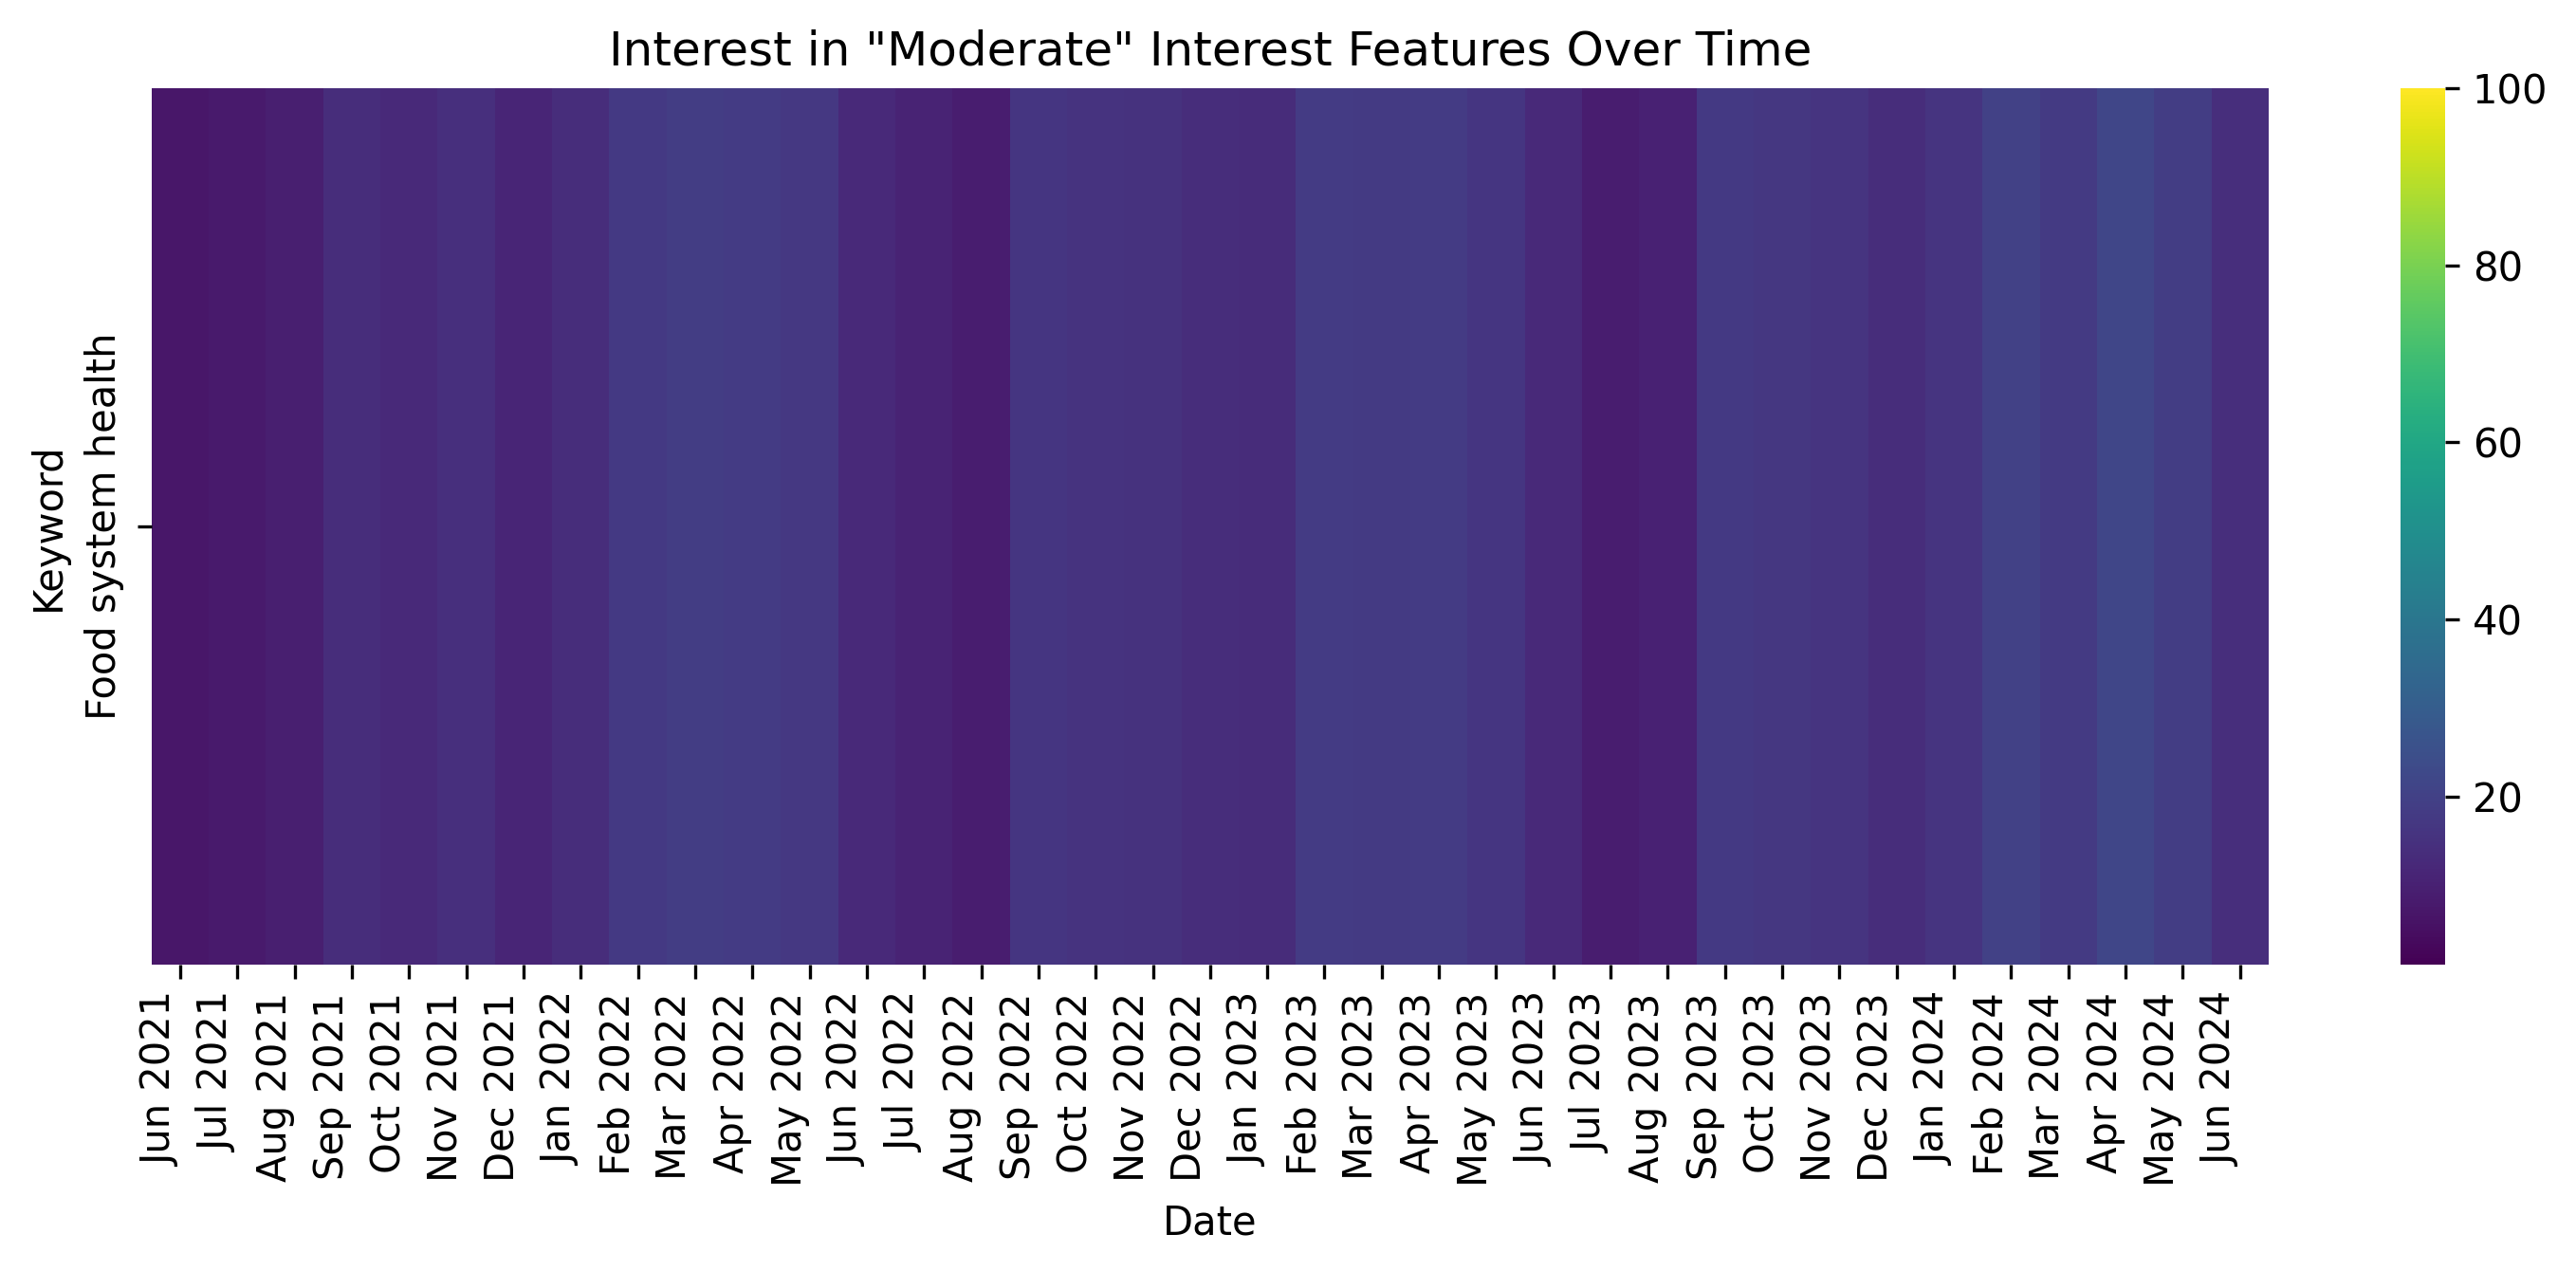

In [ ]:
# Return heatmap for moderate interest features
create_heatmap(moderate_interest_df, 'Moderate')

**Observations:**
* Interest in 'Food system health' (the only 'moderate' interst feature) has remained consistently low over the three years, primarily ranging between 0 and 40.
* A noticeable increase in interest has occurred since late 2023, with sustained levels above 20 units and two distinct peaks in 2024, which can be observed by less darker colors in this interval and two bars in a lighter shade of blue, indicating values between 40 and 50.
* The diagram shows that interest is historically low in the summer months from June until August, therefore a decline can be expected also in 2024. This is validated by the bar for June 2024 being substantially darker than the previous bars.

**Conclusion:**

The feature 'Food system health' has consistently low interest, but the data suggests that an increase in interest is possible, while a temporary decrease in the coming summer months is likely.

<a name='features-high-visualizations'></a>
#### Weekly Interest for High Interest Features
* Aggregate the data over monthly intervals.
* Use a heatmap to show patterns in interest over time.

In [ ]:
# Show high interst features
high_interest_df.head(3)

,Educational value,Remote access and control,Plant identification
date,,,
2021-06-27,42,0,86
2021-07-04,39,32,97
2021-07-11,31,29,92


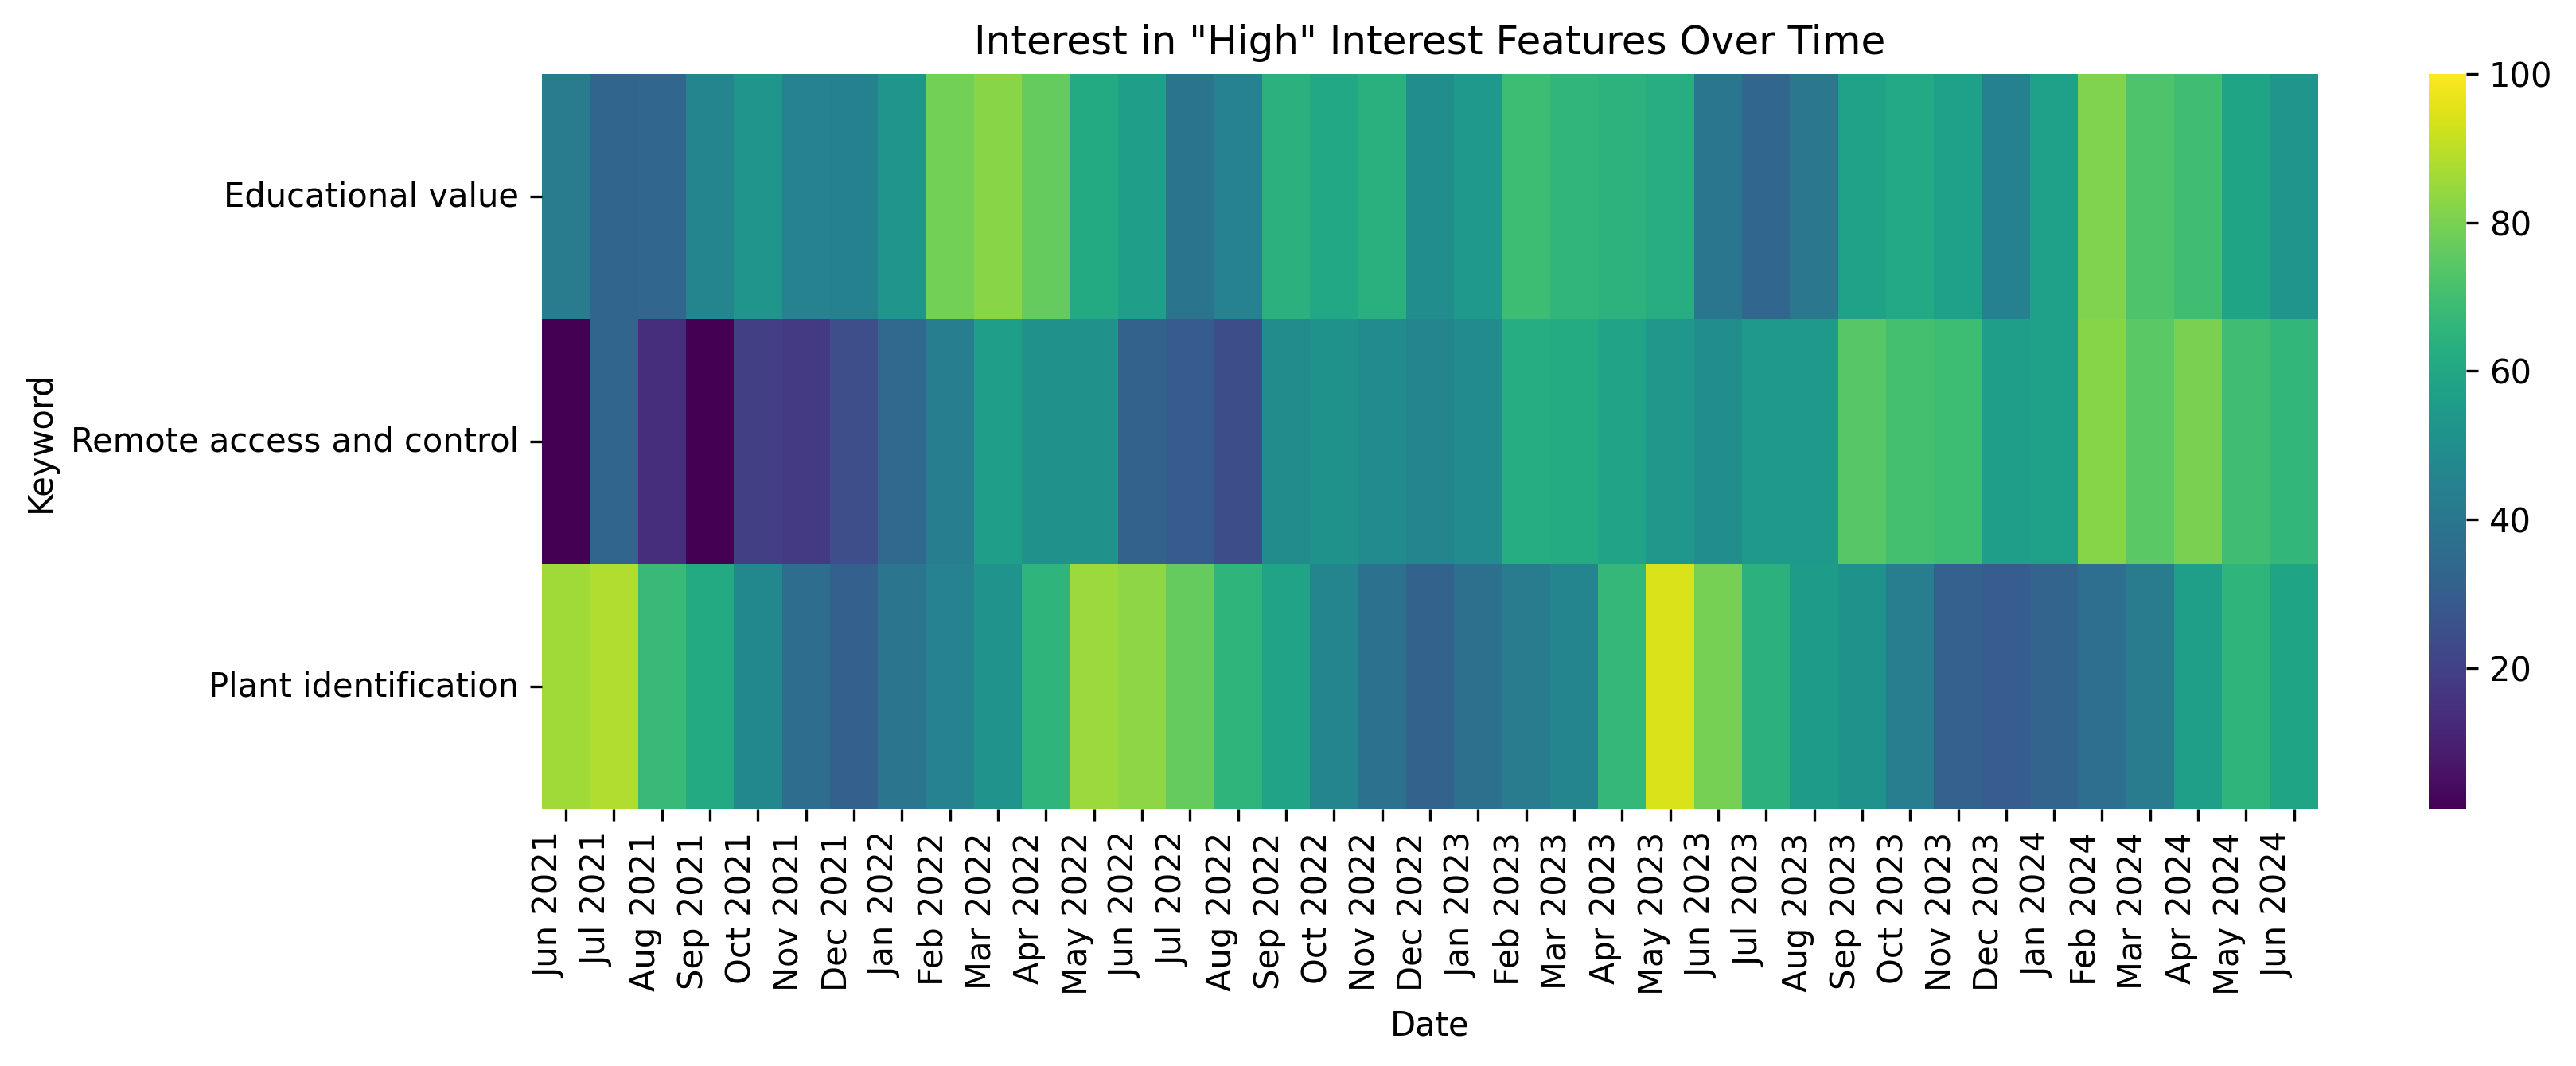

In [624]:
# Return heatmap for high interest features
create_heatmap(high_interest_df, 'High')

**Observations:**

* **'Educational Value'**:  
  * Interest has consistently remained approximately above 30 throughout the three-year period, highlighting a sustained baseline of interest.
  * A notable increase occured in spring 2022, with interest from 60 to 90 over 5 months.
  * The interest has continued to rise since then, reaching another peak in spring 2024 and remaining high (between 60 and 80) in the current period.
* **'Remote access and control':**
  * This keyword demonstrates a notable growth trajectory over the last 3 years.
  * Starting from very low interest in 2021, it experienced a gradual and consistent increase, culminating in being the keyword with the highest interest in the current period, ranging between 50 and 90 since September 2022.

* **'Plant identification':**
  * A clear seasonal pattern is evident, with peak interest consistently occurring during the summer months of each year.
  * While the overall interest in 2024 appears slightly lower than in previous years, there's a recent increase in interest starting from April 2024, suggesting the possibility of another summer peak.

**Conclusion:**
 * 'Educational value' maintains consistently high interest, while 'Remote access and control' shows a notable upward trend, currently holding the highest interest among the analyzed keywords. 'Plant identification' demonstrates a strong seasonal pattern, possibly linked to summer in the northern hemisphere. These findings suggest prioritizing 'Remote access and control' for further analysis and inclusion in the prototype, while further investigating the potential of 'Educational value' and the seasonal nature of 'Plant identification'.






<a name='features-critical-visualizations'></a>
#### Visualize Interest for Critical Interest Features Over Time
* Aggregate the data over monthly intervals.
* Use a heatmap to show patterns in interest over time.

In [ ]:
# Show critical interest features
critical_interest_df.head(3)

,Plant detection,Solar powered
date,,
2021-06-27,34,90
2021-07-04,34,93
2021-07-11,33,86


In [ ]:
# Define a function to costruct a heatmap showing monthly interest over 3 years
def create_heatmap(df, interest_level, category='Features'):
    """
    This function takes a DataFrame with a date index and multiple keyword columns,
    resamples the data to a monthly frequency, transposes it, and creates a heatmap.

    Parameters:
    df (pd.DataFrame): The input DataFrame with a date index and keyword columns.
    interest_level (str): The interest level description to be used in the heatmap title.
    category (str): The category of the interest level ('Features'/'Problems'/'Needs').

    Returns:
    None
    """
    # Ensure the date column is set as index
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame index must be a DatetimeIndex.")

    # Resample the data to a monthly frequency and take the mean
    df_monthly = df.resample('M').mean()

    # Transpose the DataFrame for heatmap
    df_transposed = df_monthly.T

    # Change the column labels to display month and year
    df_transposed.columns = df_transposed.columns.strftime('%b %Y')

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_transposed, cmap='viridis', cbar=True, vmin=1, vmax=100)
    plt.title(f'Interest in "{interest_level}" Interest {category} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Keyword')
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.show()

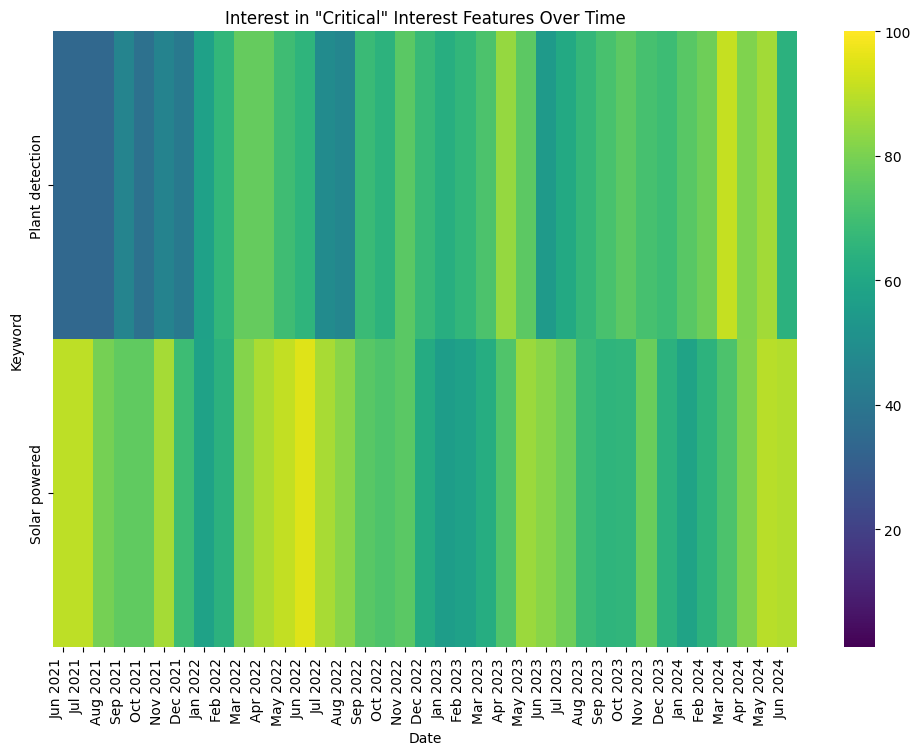

In [ ]:
# Return heatmap for critical interest features
create_heatmap(critical_interest_df, 'Critical')

**Interpretation of Results:**

* **'Plant detection'**:  
  * Interest has consistently increased over the last three years, transitioning from moderate levels (40-60) in the first half of 2021 to high levels (60-100) since January 2022, continuosly rising since then
  *  There have been two notable decreases: one in the summer of 2022 (50) and another recent one in June 2024 (70).
  * Overall, the trend is upward, with no strong evidence of seasonality.
* **'Solar powered':**
  * Interest has remained consistently high throughout the three years, rarely dipping below 50.
  * The data suggests seasonality, with higher interest during summer months.
  * While a slight decline was observed in the summer of 2023, interest has rebounded and increased since February 2024 to a current value of 90.

* **Conclusion:**
 * The steady increase in interest for 'Plant detection' over the past three years, despite minor fluctuations, highlights its potential as a valuable feature to consider for the MVP. The consistently high interest in 'Solar powered,' with a clear seasonal peaks in summer, suggests long term interest in this feature and makes it a strong candidate for the prototype as well.Both features are valuable for further analysis, this analysis should include an investigation of the seasonality in interest for 'Solar powered'.





<a name='key-problems-analysis'></a>
## Key Problems Analysis
- Identify and evaluate the proposed problems most relevant to potential customers.
- Analyze trends in interest for most relevant problems.
- Visualize interest over time for the key problems.

<a name='most-relevant-problems'></a>
### Determine Problems with Highest Relevance
- Present problems sorted by their relevance.
- Determine problems with significant relevance.
- Establish thresholds to classify problems into the following categories:
  - Critical: Essential and highly relevant problems.
    - Average weekly interest 75% - 100%
  - High: Very important and significantly relevant problems.
    - Average weekly interest: 50% - 75%
  - Moderate: Important but not essential problems.
    - Average weekly interest: 10% - 50%
  - Low: Problems of little relevance - will be excluded from further analysis.
    - Average weekly interest: 0% - 10%
- The percentages used to define the interest categories are relative to the highest observed average weekly interest value in the dataset.



In [ ]:
# Show problems sorted by relevance dataframe
problems_by_relevance.head(3)

,interest,weekly_average_interest
Monoculture in agriculture,2397,15.324
Separation of food production from natural ecosystems,158,1.010
Lack of understanding of the natural world,108,0.690


In [ ]:
# Classify feature keyword into interest categories
problems_by_relevance = get_relative_interest(problems_by_relevance)
problems_by_relevance.head(3)

,interest,weekly_average_interest,relevance
Monoculture in agriculture,2397,15.324,Critical
Separation of food production from natural ecosystems,158,1.010,Low
Lack of understanding of the natural world,108,0.690,Low


In [ ]:
# Calculate percentage of low interest problems
low_relevance_percentage = round((problems_by_relevance['relevance'] == 'Low').mean() * 100)
print(f'Percentage of low interest problems: {low_relevance_percentage}%')

Percentage of low interest problems: 91%


In [ ]:
# Compare the higest relevance problem with the highest relevance feature
highest_relevance_problem = problems_by_relevance.loc[problems_by_relevance['relevance'] == 'Critical'].head(1)
highest_relevance_feature = features_by_interest.loc[features_by_interest['relevance'] == 'Critical'].head(1)

# Get the highest interest values
problem_interest = highest_relevance_problem['weekly_average_interest'].values[0]
feature_interest = highest_relevance_feature['weekly_average_interest'].values[0]

# Calculate difference in interest between the highest relevance feature and problem
difference = feature_interest - problem_interest

# Convert difference to a percentage of the problem's interest
percentage_difference = (difference / problem_interest) * 100

print(f'The most relevant problem is {round(percentage_difference)}% less relevant than the most relevant feature')


The most relevant problem is 390% less relevant than the most relevant feature


In [ ]:
# Show highest relevance problem
highest_relevance_problem

,interest,weekly_average_interest,relevance
Monoculture in agriculture,2397,15.324,Critical


In [ ]:
# Show highest relevance feature
highest_relevance_feature

,interest,weekly_average_interest,relevance
Solar powered,11745,75.086,Critical


In [ ]:
# Show moderate interest features
features_by_interest[features_by_interest['relevance']=='Moderate']

,interest,weekly_average_interest,relevance
Food system health,2304,14.73,Moderate


**Interpretation of the Results:**
* 91% of Proposed Problems Have Low Relevance:
  * The data reveals that only one proposed problem has an average weekly interest exceeding 10%. The remaining 91% of problems demonstrate low weekly interest, averaging below 10%. This indicates low demand for a solution for these problems. The prototype should not prioritize addressing these problems, and they will be excluded from further analysis.
* Critical Relevance:
  * The only relevant problem is 'Monoculture in agriculture', which is the only problem with weekly interest exceeding 10%. This problem should be the primary focus of the prototype development.
  * While 'Monoculture in agriculture' is the most relevant problem, it's important to note its interest level is 390% lower than the top-ranked feature, 'Solar powered'. However, it still shows moderate interest, comparable to the feature 'Food system health', which received a similar weekly interest score of 14.73.
  * Due to its critical relevance to the problem domain and its moderate level of interest, the trend in interest for 'Monoculture in agriculture' will be further analyzed to determine if interest in this topic is growing, stable, or declining.

<a name='key-problems-trend-analysis'></a>
### Detailed Trend Analysis of Key Problem(s)
- Analyze trends in interest for problems with moderate to critical relevance
  - Calculate and interpret summary statistics
    - Count
    - Mean
    - Standard Deviations
    - Minimum Interest
    - Maximum Interest
    - Quartiles
    - Variance (inferred)
  - Identify Trends
    - Determine if interest over the last 3 years is increasing, decreasing or stable.
    - Determine peaks and troughts in interest.
    - Determine if interest is currently rising or falling.

<a name='trends-critical-problems'></a>
#### Summary Statistics for Critical Interest Problems

In [ ]:
# Show all problems with critical relevance
critical_relevance_df = get_relevant_keywords_df(problems_by_relevance, problems_relevance_over_time, 'Critical')
critical_relevance_df.head(3)

,Monoculture in agriculture
date,
2021-06-27,0
2021-07-04,0
2021-07-11,0


In [ ]:
# Show summary stats for critical relevance problems
summary_stats_critical_relevance = critical_relevance_df.describe().round().astype(int)
summary_stats_critical_relevance

,Monoculture in agriculture
count,157
mean,15
std,28
min,0
25%,0
50%,0
75%,0
max,100


**Interpretation of Results: 'Monoculture in agriculture'**
- There are 157 weekly observations for this problem.
- Interest tends to cluster at a moderate value of 15.
- Interest levels typically deviate from the mean by 28 units, indicating a substantial standard deviation. This indicates a highly variable interest in this problem.
- The lowest recorded interest is 0, and all quartiles are also 0, indicating a complete lack of interest in 'Monoculture in Agriculture' for at least 75% of the observed weeks.
- A maximum interest level of 100 suggests short-lived periods of intense interest, likely skewing the mean upwards.
- Overall the data suggests a pattern of near-zero interest interrrupted by occasional spikes of critically high interest. Further analysis is crucial to understand the timing and potential causes of these high-interest periods, as well as the overall trend in interest over time.

#### Trend Analyis for Critical Interest Problem(s)
* Assess whether interest is increasing, decreasing, or stable over the past 3 years.
* Assess peaks and troughs in interest levels.
* Determine current trend in interest.

Evaluation of Trend Direction and Magnitude

In [ ]:
# Get interest trends for critical interst problems
analyze_interest_trends(critical_relevance_df, slope_decimals=4)

Analysis for 'Monoculture in agriculture':
Slope: 0.0047
P-value: 0.506240854797115
Yearly change in interest: 1.73 units
--------------------------------------------------



**Interpretation of Results:**
* The slight increase in interest for 'Monoculture in agriculture' over the observed three-year period is likely due to random fluctuations (noise) rather than a statistically significant trend.
* The p-value of 0.506, which is well above the commonly accepted threshold for statistical significance (0.05), supports this conclusion.
* While further analysis may reveal additional insights, it is highly probable that there has been no significant positive change in interest in 'Monoculture in agriculture' during this time frame.

Evaluation of Trend Variability

In [ ]:
# Calculate peaks and troughs in critical intersest problems
peaks_throughs_dict = get_peaks_and_troughs(critical_relevance_df)
peaks_throughs_dict.keys()

dict_keys(['Monoculture in agriculture'])

Analyze peaks and troughs for 'Monoculture in agriculture'

In [ ]:
# Show the dataframe
peaks_throughs_dict['Monoculture in agriculture'].head(3)

,Interest,Peak,Trough
Date,,,
2021-06-27,0,False,False
2021-07-04,0,False,False
2021-07-11,0,False,False


In [ ]:
# Calculate average peaks and troughs and show dates with highest and lowest interest
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest = (
    analyze_peaks_and_troughs(peaks_throughs_dict['Monoculture in agriculture'])
)

The date with the highest interest is 08/22/2021
--------------------------------------------------
The date with the lowest interest is 10/03/2021
--------------------------------------------------
Average Peaks Per Year:
Year
2021    89
2022    66
2023    60
2024    82
--------------------------------------------------
Average Troughs Per Year:
Year
2021    0
2022    0
2023    7
2024    0
--------------------------------------------------


In [ ]:
# Calculate growth rate between peaks from 2021 to 2024
growth_rate = (average_peaks.iloc[-1] - average_peaks.iloc[0]) / average_peaks.iloc[0] * 100
print(f'Percentage change in average peak interest: {round(growth_rate, 2)}%')

Percentage change in average peak interest: -7.87%


**Interpretation of Results:**
* The data reveals a highly variable interest in 'Monoculture in Agriculture', with interest levels ranging from 0 to 100. The average peak interest has slightly decreased by 7.9% over the past three years, and there is no evidence of a significant upward trend.
* The highest and lowest interest dates are close together, supporting the hypothesis that peaks in interest are random events rather than part of a consistent pattern.
* While there is no consistent high level of interest, the topic's relevance for prototype development requires further investigation. A seasonal analysis could reveal patterns in interest fluctuations throughout the year, providing valuable insights in potential seasonal interest patterns in this problem.


#### Evaluation of Current Trends

Analyze Current Trend for 'Monoculture in agriculture'

In [ ]:
# Determine if interest is currently increasing or decreasing
determine_current_trend(peaks_throughs_dict['Monoculture in agriculture'])

The last trough value was 0 on 06/09/2024.
--------------------------------------------------
The current interest value is 17 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 2 week(s).


**Interpretation of Results:**
* Interest in 'Monoculture in agriculture' has recently spiked, increasing from 0 to 17 units over the past two weeks.
* While this increase aligns with the topic's historically volatile interest patterns, it could also signal a potential shift towards more sustained engagement.
* Further monitoring and analysis are crucial to determine if this is another short-lived burst of interest or the beginning of a longer-term trend.

<a name='problems-visualizations'></a>
### Visualizations: Interest Over Time For Key Problems
* Aggregate the data over monthly intervals.
* Use a heatmap to show patterns in interest over time.

<a name='problems-critical-visualizations'></a>
#### Visualization for Critical Interest Problems
* Visualize weekly interest over 3 years

In [ ]:
# Show data to visualize
critical_relevance_df.head(3)

,Monoculture in agriculture
date,
2021-06-27,0
2021-07-04,0
2021-07-11,0


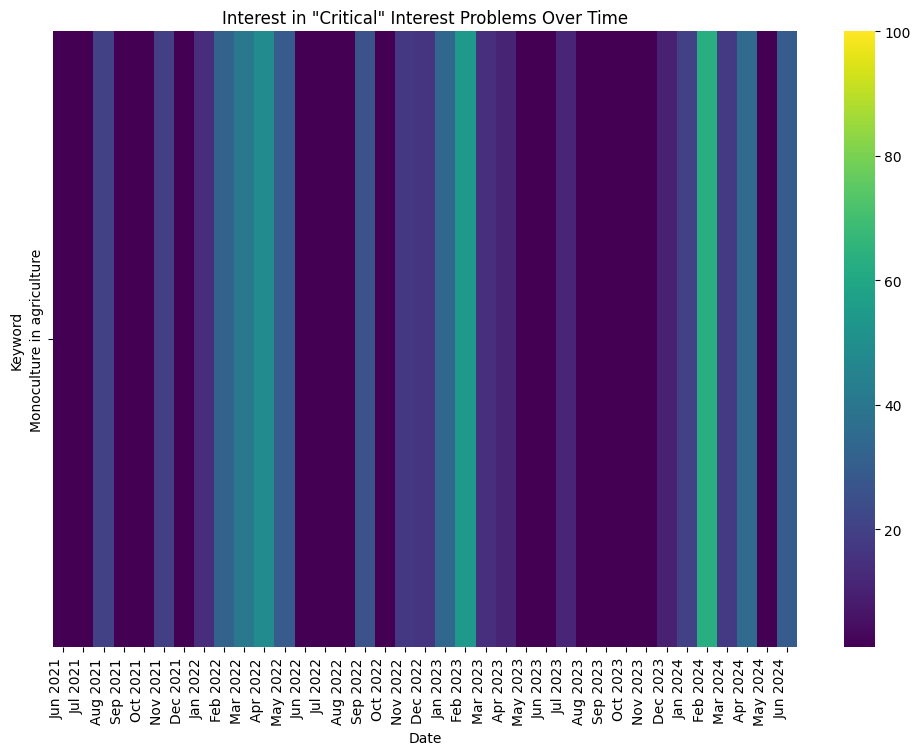

In [ ]:
# Create a heatmap to show interest over time
create_heatmap(critical_relevance_df, 'Critical', category='Problems')

**Interpretation of Results:**

* Interest in 'Monoculture in agriculture' is highly volatile, with most weeks showing little to no interest. However, there are distinct peaks of high interest, typically occurring once a year in the spring months, particularly February. These peaks could be related to the planting season in the northern hemisphere.
* The most recent peak, in February 2024, was the highest recorded at around 70. While interest has declined since then, it's notable that June 2024 shows the highest interest for that month over the past three years. This could indicate a potential upward trend, although May 2023 saw a drop to zero, introducing some uncertainty.

**Conclusion:**
* Given that 'Monoculture in agriculture' received the highest
interest among the suggested problems, it will be considered for further analysis. However, to ensure the more relevant problems are addressed with the prototype, additional data should be gathered on alternative keywords.

<a name='key-needs-analysis'></a>
## Key Needs Analysis
- Identify and evaluate high priority needs of potential customers.
- Analyze trends in interest for most relevant needs.
- Visualize interest over time for the key needs.

<a name='most-relevant-needs'></a>
### Determine Needs with Highest Relevance
- Present needs sorted by their relevance.
- Determine needs with significant relevance.
- Establish thresholds to classify needs into the following categories:
  - Critical: Essential and highly relevant needs.
    - Average weekly interest 75% - 100%
  - High: Very important and significantly relevant needs.
    - Average weekly interest: 50% - 75%
  - Moderate: Important but not essential needs.
    - Average weekly interest: 10% - 50%
  - Low: Needs of little relevance - will be excluded from further analysis.
    - Average weekly interest: 0% - 10%
- The percentages used to define the interest categories are relative to the highest observed average weekly interest value in the dataset.



In [ ]:
# Show needs sorted by relevance dataframe
needs_by_relevance.head(3)

,interest,weekly_average_interest
Climate resilience,8776,56.105
Educational AI,4612,29.485
Sustainable food production,3989,25.502


In [ ]:
# Add a categorical column splitting keywords into categories
needs_by_relevance = get_relative_interest(needs_by_relevance)
needs_by_relevance.head(4)

,interest,weekly_average_interest,relevance
Climate resilience,8776,56.105,Critical
Educational AI,4612,29.485,High
Sustainable food production,3989,25.502,Moderate
Biodiversity preservation,877,5.607,Low


In [ ]:
# Calculate percentage of low interest needs
low_relevance_percentage = round((needs_by_relevance['relevance'] == 'Low').mean() * 100)
print(f'Percentage of low relevance needs: {low_relevance_percentage}%')

Percentage of low relevance needs: 86%


In [ ]:
# Show moderate interst features
features_by_interest[features_by_interest['relevance']=='Moderate']

,interest,weekly_average_interest,relevance
Food system health,2304,14.73,Moderate


In [ ]:
# Show high interst features
features_by_interest[features_by_interest['relevance']=='High']

,interest,weekly_average_interest,relevance
Educational value,8770,56.067,High
Plant identification,8530,54.533,High
Remote access and control,7605,48.619,High


In [ ]:
# Show critical interest problems
problems_by_relevance[problems_by_relevance['relevance']=='Critical']

,interest,weekly_average_interest,relevance
Monoculture in agriculture,2397,15.324,Critical


**Interpretation of the Results:**
* 86% of Proposed Needs Have Low Relevance:
  * The majority of proposed needs (86%) show low relevance, with weekly interest levels falling below 10%.
  * These low relevance needs will not be considered for further analysis.
* Moderate Relevance:
  * 'Sustainable food production' is the only need identified as moderately relevant, with an average weekly interest of 25 units.
  * Further trend analysis is necessary to determine if this need justifies inclusion in the prototype development.
* High Relevance:
  * Despite its high relevance classification, the interest level of 29 units in 'Educational AI' is only slightly higher than the moderately relevant need 'Sustainable food production'.
  * Interst is substantially lower than the lowest high insterest value feature 'Remote access and control' (48).
  *  Further trend analysis will determine this keyword's relevance for further analysis and prototype development.
* Critical Relevance:
  * 'Climate resilience' stands out with critical average montly relevance of 58 units, indicating strong interest. While its interest level would be considered 'high' relative to feature keywords, it remains a top priority for further analysis and potential inclusion in the prototype.

<a name='key-needs-trend-analysis'></a>
### Detailed Trend Analysis of Key Needs
- Analyze trends in interest for needs with moderate to critical relevance
  - Calculate and interpret summary statistics
    - Count
    - Mean
    - Standard Deviations
    - Minimum Interest
    - Maximum Interest
    - Quartiles
    - Variance (inferred)
  - Identify Trends
    - Determine if interest over the last 3 years is increasing, decreasing or stable.
    - Determine peaks and troughts in interest.
    - Determine if interest is currently rising or falling.

<a name='trends-moderate-needs'></a>
#### Summary Statistics for Moderate Interest Needs

In [ ]:
# Show all needs with moderate relevance
moderate_relevance_df = get_relevant_keywords_df(needs_by_relevance, needs_relevance_over_time, 'Moderate')
moderate_relevance_df.head(3)

,Sustainable food production
date,
2021-06-27,14
2021-07-04,11
2021-07-11,15


In [ ]:
# Get summary stats
summary_stats_moderate_relevance = moderate_relevance_df.describe().round().astype(int)
summary_stats_moderate_relevance

,Sustainable food production
count,157
mean,25
std,10
min,0
25%,18
50%,26
75%,33
max,48


**Interpretation of Results:**
- The data for 'Sustainable food production' reveals a relatively stable interest level over the last three years, with an average weekly interest of 25 units.
- The standard deviation of 10 indicates moderate variability compared to other analyzed keywords, indicating relatively stable interest.
- The lowest recorded interest is 0, meaning there was at least one week with no interest in the topic.
- A maximum interest level of 48 suggests consistently moderate interest in this feature.
- Interest ranges from 0 to 48, suggesting fluctuations over time, but the majority of data points cluster between 18 and 33, indicating consistent moderate interest. The maximum interest of 48 suggests occasional peaks of interest, although these are not as extreme as in other keywords.
- Overall, 'Sustainable food production' shows consistent moderate interest with some variability. The stability of interest suggests sustained attention to this subject, making it a potentially valuable area for further exploration and potential inclusion in prototype development.

#### Trend Analysis Moderate Interest Needs
* Assess whether interest is increasing, decreasing, or stable over the past 3 years.
* Assess peaks and troughs in interest levels.
* Determine current trend in interest.

Evaluation of Trend Direction and Magnitude

In [ ]:
# Get interest trends for moderate interest needs
analyze_interest_trends(moderate_relevance_df, slope_decimals=4)

Analysis for 'Sustainable food production':
Slope: 0.016
P-value: 9.490165010454252e-12
Yearly change in interest: 5.85 units
--------------------------------------------------


**Interpretation of Results:**
* Interest in the proposed need 'Sustainable food production' is increasing moderately at a yearly rate of ~5.85 units (more than 5% every year).
* The trend is statistically significant (p-value < 0.05).
* The moderate increase in interest in 'Sustainable food production' highlights this need becomes more relevant over time, making it relevant for further analysis and inclusion in the prototype design.

Evaluation of Trend Variability

In [ ]:
# Calculate peaks and troughs in moderate interest needs
peaks_throughs_dict = get_peaks_and_troughs(moderate_relevance_df)
peaks_throughs_dict.keys()

dict_keys(['Sustainable food production'])

In [ ]:
# Show dataframe with boolean columns for peaks and troughs
peaks_throughs_dict['Sustainable food production'].head(3)

,Interest,Peak,Trough
Date,,,
2021-06-27,14,False,False
2021-07-04,11,False,True
2021-07-11,15,True,False


In [ ]:
# Calculate average peaks and troughs and show dates with highest and lowest interest
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest = (
    analyze_peaks_and_troughs(peaks_throughs_dict['Sustainable food production'])
)

The date with the highest interest is 04/28/2024
--------------------------------------------------
The date with the lowest interest is 07/18/2021
--------------------------------------------------
Average Peaks Per Year:
Year
2021    19
2022    31
2023    32
2024    40
--------------------------------------------------
Average Troughs Per Year:
Year
2021     8
2022    21
2023    24
2024    31
--------------------------------------------------


In [ ]:
# Calculate growth rate between peaks from 2021 to 2024
growth_rate = (average_peaks.iloc[-1] - average_peaks.iloc[0]) / average_peaks.iloc[0] * 100
print(f'Percentage change in average peak interest: {round(growth_rate, 2)}%')

Percentage change in average peak interest: 110.53%


In [ ]:
# Calculate the highest and lowest interest value
print(f'Highest interest: {peaks_by_interest.iloc[0]["Interest"]}')
print(f'Lowest interest: {troughs_by_interest.iloc[0]["Interest"]}')

Highest interest: 48
Lowest interest: 0


**Interpretation of Results:**

* The data reveals a clear upward trend in interest for 'Sustainable food production' over the past three years, with the highest peak (48) occurring recently on April 28, 2024, and the lowest trough (0) on July 18, 2021. This suggests a growing interest in the topic, which is further supported by the increasing average peak interest, which has more than doubled from 2021 to 2024.
* This significant difference and the recency of the peak strongly suggest a sustained and growing relevance of this need, supported by constantly growing values for both peaks and troughs over the last 3 years.
* The consistently increasing interest along with the consistently moderate values of interest make this need a strong candidate for inclusion in the prototype design and for further analysis.


Evaluation of Current Trend

In [ ]:
determine_current_trend(peaks_throughs_dict['Sustainable food production'])

The last trough value was 21 on 06/16/2024.
--------------------------------------------------
The current interest value is 25 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 1 week(s).


**Interpretation of Results:**
* Interest in 'Sustainable food production' has increased by 4 units over the last week, reaching a current moderate value of 25.
* This recent increase is consistent with the overall upward trend observed in the data over the past three years, suggesting a continued and gradual growth in the relevance of this need.
* Continued monitoring and analysis are required to fully understand the nature of this trend.

<a name='trends-high-needs'></a>
#### Summary Statistics for High Interest Needs

In [ ]:
# Show all needs with high relevance
high_relevance_df = get_relevant_keywords_df(needs_by_relevance, needs_relevance_over_time, 'High')
high_relevance_df.head(3)

,Educational AI
date,
2021-06-27,0
2021-07-04,0
2021-07-11,0


In [ ]:
# Get summary stats
summary_stats_high_relevance = high_relevance_df.describe().round().astype(int)
summary_stats_high_relevance

,Educational AI
count,157
mean,29
std,32
min,0
25%,0
50%,14
75%,53
max,100


**Interpretation of Results:**
- The data for 'Educational AI' reveals a highly volatile interest pattern over the past three years, with an average weekly interest of 29 units.  
- The standard deviation of 32, spanning from 0 to 100, indicates a wide range of interest levels. This volatility is further supported by the fact that the lowest 25% of values are zero, while the top 75% are above 53.
- A median (14) considerably lower than the mean (29) suggests that the distribution is skewed to the right, with more weeks with lower interest and some weeks with exceptionally high interest.
- Overall, interest in 'Educational AI' is sporadic, characterized by periods of very low or no interest and bursts of high interest. A trend analysis will determine if any patterns exist within this volatility and to assess the overall trajectory of interest in this topic over time.

#### Trend Analysis High Interest Needs
* Assess whether interest is increasing, decreasing, or stable over the past 3 years.
* Assess peaks and troughs in interest levels.
* Determine current trend in interest.

Evaluation of Trend Direction and Magnitude

In [ ]:
# Perform linear regression analysis
analyze_interest_trends(high_relevance_df, slope_decimals=4)

Analysis for 'Educational AI':
Slope: 0.0927
P-value: 1.0905973993669947e-62
Yearly change in interest: 33.84 units
--------------------------------------------------



**Interpretation of Results:**
- The positive slope of 0.0927 signifies an upward trend in interest over time with a substantial yearly increase in interst of ~33.84 units.
- The extremely small p-value (1.09e-62) is far below the typical threshold of 0.05 for statistical significance, proving that the observed increase in interst is not due to chance.
- 'Educational AI' is a prime candidate for consideration in the design process of the prototype and for further analysis, due rapid increase of interest over the last 3 years.

Evaluation of Trend Variability

In [ ]:
# Calculate peaks and troughs in high interest needs
peaks_throughs_dict = get_peaks_and_troughs(high_relevance_df)
peaks_throughs_dict.keys()

dict_keys(['Educational AI'])

In [ ]:
# Calculate average peaks and troughs and show dates with highest and lowest interest
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest = (
    analyze_peaks_and_troughs(peaks_throughs_dict['Educational AI'])
)

The date with the highest interest is 05/19/2024
--------------------------------------------------
The date with the lowest interest is 11/07/2021
--------------------------------------------------
Average Peaks Per Year:
Year
2021    14
2022    12
2023    46
2024    91
--------------------------------------------------
Average Troughs Per Year:
Year
2021     0
2022     0
2023    36
2024    80
--------------------------------------------------


In [ ]:
# Calculate the highest and lowest interest value
print(f'Highest interest: {peaks_by_interest.iloc[0]["Interest"]}')
print(f'Lowest interest: {troughs_by_interest.iloc[0]["Interest"]}')

Highest interest: 100
Lowest interest: 0


In [ ]:
# Calculate growth rate between peaks from 2021 to 2024
growth_rate = (average_peaks.iloc[-1] - average_peaks.iloc[0]) / average_peaks.iloc[0] * 100
print(f'Percentage change in average peak interest: {round(growth_rate, 2)}%')

Percentage change in average peak interest: 550.0%


**Interpretation of Results:**
* The data reveals a clear and steep upward trend in interest for 'Educational AI' over the past three years, with the highest peak (100) occurring recently on May 19, 2024, and the lowest trough (0) almost three years prior on July 11, 2021.
* The average peak interest increased by approximately 550% from 2021 to 2024, highlighting a rapid growth rate in interest.
* The increasing average trough values, particularly in 2024, suggest that also the baseline interest in 'Educational AI' is rapidly growing, not just the peaks.
* Overall, the rapidly and consistently increasing interest along with the currently execptionally high values in interest make this need a very strong candidate for inclusion in the prototype design and for further analysis.


Evaluation of Current Trend

In [ ]:
# Check if the current value is higher than the last trough value
determine_current_trend(peaks_throughs_dict['Educational AI'])

The last trough value was 68 on 06/09/2024.
--------------------------------------------------
The current interest value is 78 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 2 week(s).


**Interpretation of Results:**
* Interest in 'Educational AI' has seen a moderate increase of 10 units over the past two weeks, reaching a critically high value of 78.
* The current trend correlates with the steep upward trend observed over the last 3 years.

<a name='trends-critical-needs'></a>
#### Summary Statistics for Critical Interest Needs

In [ ]:
# Show all needs with critical relevance
critical_relevance_df = (
    get_relevant_keywords_df(needs_by_relevance, needs_relevance_over_time, 'Critical')
)
critical_relevance_df.head(3)

,Climate resilience
date,
2021-06-27,27
2021-07-04,18
2021-07-11,23


In [ ]:
# Get summary stats
summary_stats_critical_relevance = critical_relevance_df.describe().round().astype(int)
summary_stats_critical_relevance

,Climate resilience
count,157
mean,56
std,18
min,17
25%,45
50%,56
75%,66
max,100


**Interpretation of Results:**
- The data indicates consistently high interest in 'Climate resilience' over the past three years, with an average weekly interest of 56 units.
- The standard deviation of 18, spanning from 17 to 100, suggests a moderate range of interest levels. The median value is equal to the mean (56), indicating a relatively symmetrical distribution.
- However, there are several outliers with exceptionally high interest, skewing the distribution to the right and driving the maximum interest value to 100.
- Overall, interest in 'Climate resilience' shows stable moderate to high interest over the last 3 years, with some variability due to exceptionally high interest periods.

#### Trend Analysis Critical Interest Needs
* Assess whether interest is increasing, decreasing, or stable over the past 3 years.
* Assess peaks and troughs in interest levels.
* Determine current trend in interest.

Evaluation of Trend Direction and Magnitude

In [ ]:
# Get linear regression results
analyze_interest_trends(critical_relevance_df, slope_decimals=4)

Analysis for 'Climate resilience':
Slope: 0.0494
P-value: 2.702361685859238e-46
Yearly change in interest: 18.02 units
--------------------------------------------------



**Interpretation of Results:**
- The positive slope of 0.0494 signifies an upward trend in interest over time with a substantial yearly increase in interest of ~18.02 units.
- The very small p-value (2.70e-46) is far below 0.05, proving that the observed increase in interest is not due to chance.
- 'Climate resilience' is a prime candidate for consideration in the design process of the prototype and for further analysis, due significant increase in interest over the last 3 years.

Evaluation of Trend Variability

In [ ]:
# Calculate peaks and troughs in critical interest needs
peaks_throughs_dict = get_peaks_and_troughs(critical_relevance_df)
peaks_throughs_dict.keys()

dict_keys(['Climate resilience'])

In [ ]:
# Calculate average yearly peaks and troughs and show dates with highest and lowest interest
average_peaks, average_troughs, peaks_by_interest, troughs_by_interest = (
    analyze_peaks_and_troughs(peaks_throughs_dict['Climate resilience'])
)

The date with the highest interest is 04/21/2024
--------------------------------------------------
The date with the lowest interest is 12/26/2021
--------------------------------------------------
Average Peaks Per Year:
Year
2021    36
2022    56
2023    68
2024    89
--------------------------------------------------
Average Troughs Per Year:
Year
2021    27
2022    43
2023    55
2024    80
--------------------------------------------------


In [ ]:
# Calculate the highest and lowest interest value
print(f'Highest interest: {peaks_by_interest.iloc[0]["Interest"]}')
print(f'Lowest interest: {troughs_by_interest.iloc[0]["Interest"]}')

Highest interest: 100
Lowest interest: 17


In [ ]:
# Calculate growth rate between peaks from 2021 to 2024
growth_rate = (average_peaks.iloc[-1] - average_peaks.iloc[0]) / average_peaks.iloc[0] * 100
print(f'Percentage change in average peak interest: {round(growth_rate, 2)}%')

Percentage change in average peak interest: 147.22%


**Interpretation of Results:**
* The data reveals a clear and steep upward trend in interest for 'Educational AI' over the past three years, with the highest peak (100) occurring recently on April 21, 2024, and the lowest trough (17) almost three years prior on December 26, 2021.
* The average peak interest increased by approximately 147% from 2021 to 2024, highlighting a rapid growth rate in interest.
* While 'Educational AI' experienced a much higher growth rate (550%) compared to 'Climate Resilience' (147%) over the last three years, it's essential to consider 'Climate Resilience's' higher baseline interest. Interest never dropped below 17 units.
* The lower growth rate and the sustained high interst from 2021 until now, suggests more mature relevance (awareness) of this need than of 'Educational AI'.
* The increasing average trough values, particularly in 2024, suggest that also the overall interest in 'Climate resilience' is rapidly growing, not just the peaks.
* Overall, the rapidly and consistently increasing interest along with the currently exceptionally high values in interest make this need a very strong candidate for inclusion in the prototype design and for further analysis.


Evaluation of Current Trend

In [ ]:
# Check if the current value is higher than the last trough value
determine_current_trend(peaks_throughs_dict['Climate resilience'])

The last trough value was 80 on 06/09/2024.
--------------------------------------------------
The current interest value is 88 on 06/23/2024.
--------------------------------------------------

The interest is currently increasing and has been observed for 2 week(s).


**Interpretation of Results:**
* Interest in 'Climate resilience' has seen a moderate increase of 8 units over the past two weeks, reaching a critically high current value of 88.
* The current trend correlates with the steep upward trend observed over the last 3 years.
* Relevance of this need is currently higher than relevance of all other needs compared.

<a name='needs-visualizations'></a>
### Visualizations: Interest Over Time For Key Needs
* Aggregate the data over monthly intervals.
* Use a heatmap to show patterns in interest over time.

<a name='visualizations-moderate-needs'></a>
#### Visualization for Moderate Interest Needs
* Visualize weekly interest over 3 years

In [ ]:
# Show moderate interest needs data
moderate_relevance_df.head(3)

,Sustainable food production
date,
2021-06-27,14
2021-07-04,11
2021-07-11,15


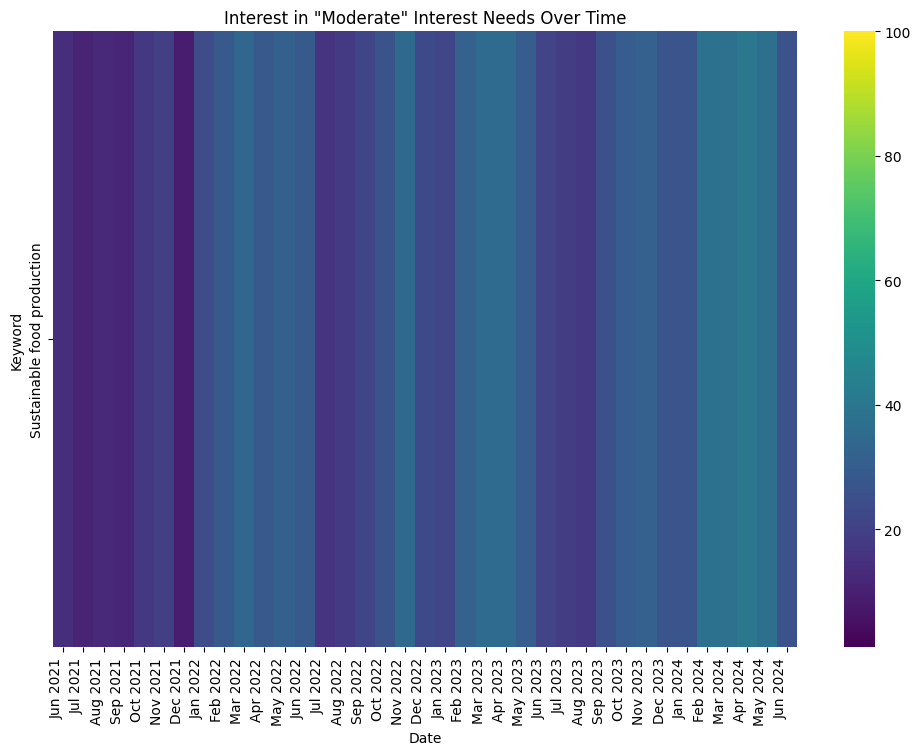

In [ ]:
# Create a heatmap to show interest over time
create_heatmap(moderate_relevance_df, 'Moderate', category='Needs')

**Interpretation of Results:**
  * The visualization reveals a consistent, though gradual, increase in interest in 'Sustainable food production' over the past three years. Interest has risen from low levels (0 - 20) in 2021 to moderate-high levels (30-50) in 2024.
  * There is a noticeable seasonal pattern, with the lowest interest typically observed in the summer months (July-September) and the highest interest during the spring (February-June). This seasonal variation could be attributed to planting and harvesting seasons, although other factors could also play a role.

* **Conclusion:**
 * The steady growth of interest in 'Sustainable food production,' coupled with its seasonal fluctuations, indicates a promising area for further analysis. This need should be considered for inclusion in the MVP design, and additional analysis should explore the factors driving the observed growth and seasonality in interest.





<a name='visualizations-high-needs'></a>
#### Visualization for High Interest Needs

In [ ]:
# Show high interest needs data
high_relevance_df.head(3)

,Educational AI
date,
2021-06-27,0
2021-07-04,0
2021-07-11,0


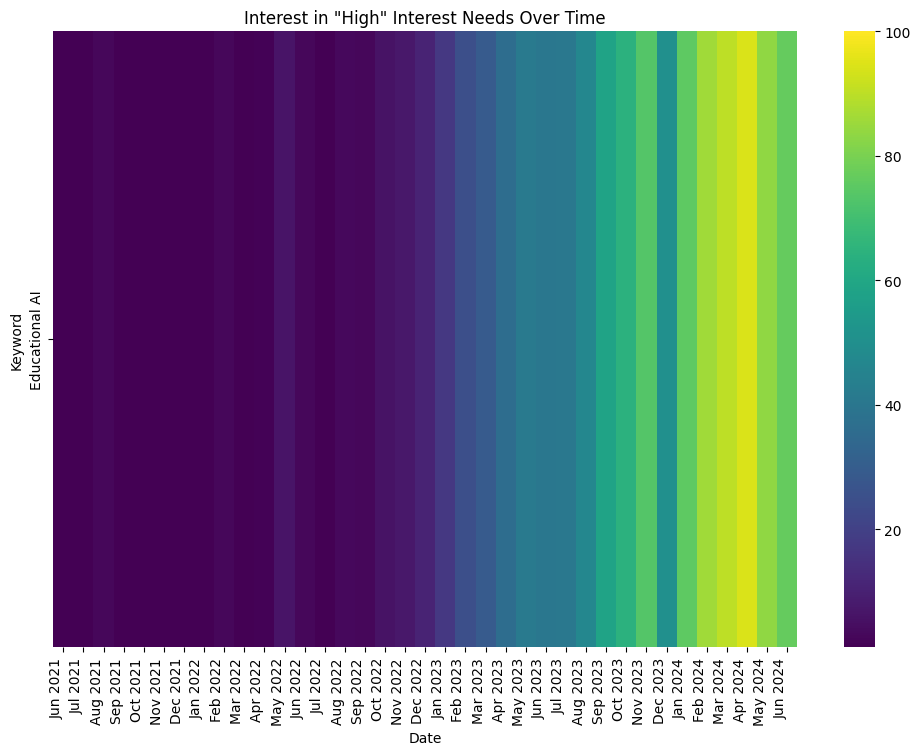

In [ ]:
# Create a heatmap to show interest over time
create_heatmap(high_relevance_df, 'High', category='Needs')

**Interpretation of Results:**
  * The visualization reveals rapid growth in interest in 'Educational AI' from January 2023 until June 2024. Interest remianed low from June 2021 until December 2022 (0 - 20) and started to grow rapidly from 20 - 100 in throughout the years 2023 and mid-2024.
  * The data shows no noticable seasonal pattern, and the overall highest interst has been obseved in April 2024.
  * Over the last 2 months interst levels decreased from 100 to 80, which suggests the potential for a drop in interest.
  * The rapid increase in interst is most likely caused by innovation in AI technology,but could be subject to other factors as well.

* **Conclusion:**
 * The rapid and consistent growth in interest in 'Educational AI' makes this need a crucial area for further analysis. This need should be considered for inclusion in the MVP design, and additional analysis should explore the factors driving the observed rapid growth and the potential for a future decrease in interest.





<a name='visualizations-critical-needs'></a>
#### Visualization for Critical Interest Needs

In [ ]:
# Show critical interest needs data
critical_relevance_df.head(3)

,Climate resilience
date,
2021-06-27,27
2021-07-04,18
2021-07-11,23


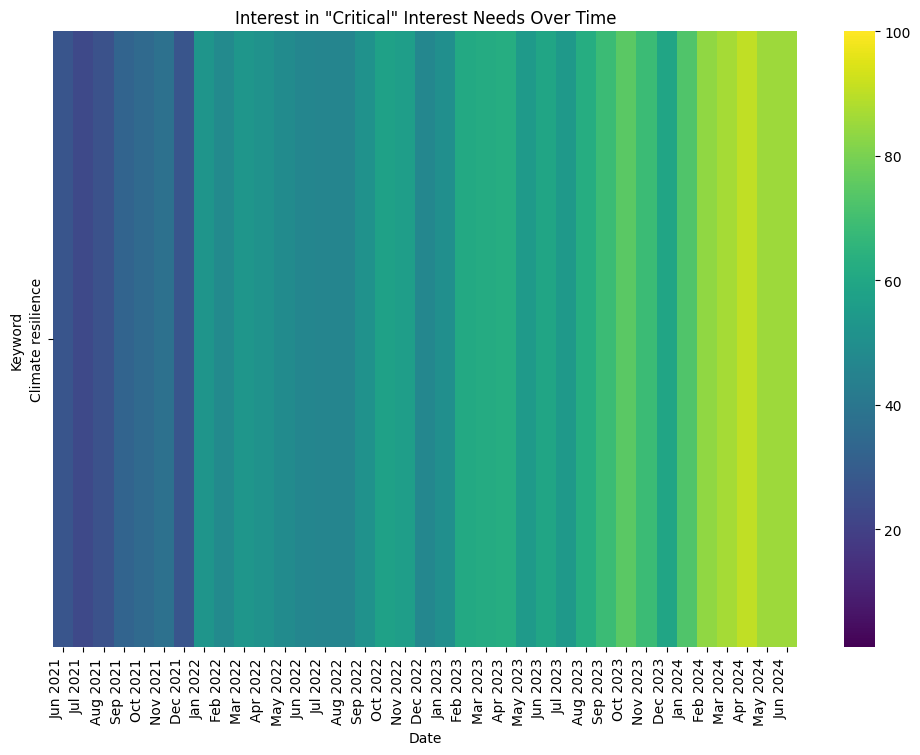

In [ ]:
# Create a heatmap to show interest over time
create_heatmap(critical_relevance_df, 'Critical', category='Needs')

**Interpretation of Results:**
  *  The visualization reveals rapid growth in interest in 'Climate resilience' starting from June 2021, with values quickly rising from low levels (0-20) in the latter half of 2021 to critically high levels (80-100) beginning around October 2022.  Interest peaked in April 2024 and remains critically high as of June 2024.
  * The data shows no noticable seasonal pattern.
  * Currently interst is critically high, and the data suggest no evidence to expect a decline, however due to the novelty of this need this needs to be further monitored.
  * The increase in interst over the last 2 years is most likely caused by  increased awareness about the effects of climate warming  and a increased desire of peope to take action, however other factors could contribute to this as well.

* **Conclusion:**
 * The rapid and consistent growth in interest in "Climate resilience" makes this need a crucial area for further analysis. This need should be strongly considered for inclusion in the MVP design, and additional analysis should explore the factors driving the observed rapid growth and investigate whether this high level of interest is likely to be sustained in the long term.





<a name='contextual-exploration'></a>
## Contextual Exploration of Most Relevant Keywords
* Present most relevant keywords out of all categories (critical interest keywords)
* Define relevant categories and sub-categories of keywords
* Explore and interpret trending related searches

<a name='most-relevant-keywords'></a>
#### Summary Table: Most Relevant Keywords
* Present and compare the most relevant keywords for features, problems and needs

In [ ]:
# Show critical relevance keywords for features
features_by_interest[features_by_interest['relevance']=='Critical']

,interest,weekly_average_interest,relevance
Solar powered,11745,75.086,Critical
Plant detection,10079,64.435,Critical


In [ ]:
# Show critical relevance keywords for problems
problems_by_relevance[problems_by_relevance['relevance']=='Critical']

,interest,weekly_average_interest,relevance
Monoculture in agriculture,2397,15.324,Critical


In [ ]:
# Show critical relevance keywords for needs
needs_by_relevance[needs_by_relevance['relevance']=='Critical']

,interest,weekly_average_interest,relevance
Climate resilience,8776,56.105,Critical


In [ ]:
# Combine all critical relevance keywords into one dataframe and add the a column for the category
critical_interest_keywords = pd.concat([
    features_by_interest[features_by_interest['relevance'] == 'Critical'].assign(category='Feature'),
    problems_by_relevance[problems_by_relevance['relevance'] == 'Critical'].assign(category='Problem'),
    needs_by_relevance[needs_by_relevance['relevance'] == 'Critical'].assign(category='Need')
])

# Remove unnecessary columns and sort by weekly_average_interest
critical_interest_keywords = (
    critical_interest_keywords
    .drop(columns=['interest', 'relevance'])
    .sort_values(by='weekly_average_interest', ascending=False)
)

critical_interest_keywords

,weekly_average_interest,category
Solar powered,75.086,Feature
Plant detection,64.435,Feature
Climate resilience,56.105,Need
Monoculture in agriculture,15.324,Problem


<a name='categories'></a>
#### Exploration of the Context of Keyword Searches
* Get Google Search suggestions to retrieve a list of related keywords.
* Analyze suggestions to explore user search intent.
* Get Google Search categories for main keyword and suggestions.
* Analyze categories to explore context of interest.

#### Evaluation of Search Suggestions

In [ ]:
# Get a list of all critical relevance keywords
critical_interest_keywords_list = critical_interest_keywords.index.tolist()
critical_interest_keywords_list

['Solar powered',
 'Plant detection',
 'Climate resilience',
 'Monoculture in agriculture']

In [ ]:
# Initialize an empty dictionary to store suggestions
suggestions_dict = {}

In [ ]:
# Get suggestions for all keywords in the list

# Iterate over each keyword in the list
for keyword in critical_interest_keywords_list:
    suggestions = pytrends.suggestions(keyword=keyword)
    suggestions_df = pd.DataFrame(suggestions).drop(columns=['mid'])
    suggestions_dict[keyword] = suggestions_df

# Return the dictionary of suggestions dataframes
suggestions_dict.keys()

dict_keys(['Solar powered', 'Plant detection', 'Climate resilience', 'Monoculture in agriculture'])

**Search Suggestions for 'Solar powered'**

In [ ]:
# Return the results for 'Solar powered'
suggestions_dict['Solar powered']

,title,type
0,Solar energy,Topic
1,Solar Powered,Topic
2,Solar-powered pump,Topic
3,Solar-powered fan,Topic
4,Solar-powered calculator,Topic


**Interpretation of Results: 'Solar powered'**
* The capitalized 'Solar Powered' is a minor variation, likely used interchangeably by searchers. It confirms the term's validity and offers a slight keyword variation for later use.
* The presence of 'Solar energy' indicates a significant interest in understanding the benefits and potential of solar technology, beyond simply using solar-powered products.
* The variety of specific solar-powered products, including 'Solar-powered pump', 'Solar-powered fan' and 'Solar-powered Calculator', suggests a demand for diverse applications, including outdoor and computing appliances. This aligns with the concept of a solar-powered garden robot.
* Further analysis should identify potential customer groups interested in various solar-powered applications, including gardening robots, and assess the competitive landscape of solar-powered products.

Conclusion:
* Overall solar-powered is a valuable feature to include in the prototype design, as there is demand for solar-powered appliances as well as interest in solar-powered technology.







In [ ]:
# Adjust pandas display settings to show more content
pd.set_option('display.max_colwidth', None)

**Search Suggestions for 'Plant detection'**

In [ ]:
# Return the suggestions for 'Plant detection'
suggestions_dict['Plant detection']

,title,type
0,"2018 International Plumbing Code, Loose-Leaf Version",Book
1,"Machine Learning Security Principles: Keep Data, Networks, Users, and Applications Safe from Prying Eyes",Book by John Mueller
2,Alkaloids: Chemical and Biological Perspectives,Book
3,Advances in Genetics,Book
4,Balaji Aglave,Writer


**Interpretation of Results: 'Plant detection'**
* The search suggestions for 'Plant detection' are all books, indicating a strong academic and research interest. This suggests that the feature is still in development, with few commercial products available.
* The book titles suggest that target audience are researchers, scientists, and students in fields like botany, agriculture, or computer vision, rather than general consumers.
* The results suggest potential collaborators in the fields of machine learning and biology, as books from both fields appear in the results. Researchers in these areas could also be potential customers for the product, as they may have an interest in testing and understanding advanced plant detection technologies.
* These specific results, suggest a scientific niche audience for this keyword.
* The search results for highlight the field's interdisciplinary nature, encompassing machine learning, medical applications and genetics and show a focus on plant disease detection (Balaji Aglave)

Conclusion:
* Users searching for 'Plant detection' seek research information rather than consumer products, suggesting a need to explore why there's a lack of product searches and if researchers would be interested in consumer products like a plant-detection gardening robot.

**Search Suggestions for 'Climate resilience'**

In [ ]:
# Return suggestions for 'Climate resilience'
suggestions_dict['Climate resilience']

,title,type
0,Climate resilience,Topic
1,The Book of Form and Emptiness,Novel by Ruth Ozeki
2,Life After Doom: Wisdom and Courage for a World Falling Apart,Book by Brian McLaren
3,Saket Soni,Author
4,Active Hope: How to Face the Mess We're in Without Going Crazy,Book by Chris Johnstone and Joanna Macy


**Interpretation of Results: 'Climate resilience'**
* The search suggestions for 'Climate resilience' highlight significant interest in both personal and community strategies to address environmental challenges.
*  Climate resilience' is identified as a key topic by Google, indicating a significant and growing interest in this area.
* All the suggested books focus on self-help and emotional resilience, reflecting people's interest in taking action to cope with societal and environmental challenges. This interest highlights the need for practical solutions that individuals and communities can use to enhance resilience.
* Saket Soni, one of the suggestions, is the founder of Resilience Force, an NGO that trains disaster recovery workers to enhance resilience. A gardening robot could support their work by improving food security and sustainability in post-disaster scenarios through climate-resilient food systems.


Conclusion:
* The results suggest a potential market for a gardening robot capable of building climate-resilient and adaptive food systems. Such a product aligns with a broad audience’s proactive mindset by providing a practical way to enhance food security and sustainability, empowering individuals and communities to take meaningful action toward a resilient future.

**Search Suggestions for 'Monoculture in agriculture'**

In [ ]:
# Return suggestions for 'Monoculture in agriculture'
suggestions_dict['Monoculture in agriculture']

,title,type
0,The Lost Supper: Searching for the Future of Food in the Flavors of the Past,Book by Taras Grescoe
1,"Big Farms Make Big Flu: Dispatches on Influenza, Agribusiness, and the Nature of Science",Book by Rob Wallace
2,Homegrown Delicata Squash: Guide and Overview,Topic
3,Purslane: Guide and Overview,Topic
4,Tall Wheatgrass Genetic Resource for Wheat,Topic


**Interpretation of Results: 'Monoculture in agriculture'**
* The suggested books and topics collectively highlight public awareness of the various problems associated with the problem of 'Monoculture in agriculture', such as its impact on diet, the environment, and disease spread.
* All of the suggested books emphasize the need for sustainable farming practices that promote biodiversity and ecological balance. The proposed gardening-robot could solve this problem by designing and creating polyculture systems that provide nutritious food and maintain yields sustainably.

Conclusion:

* The recognition of the problem of monoculture in agriculture resonates with both consumers seeking healthy food and farmers looking for more resilient food systems. The suggestions highlight the widely acknowledged negative effects of monoculture on the environment and health, underscoring the need for solutions that balance sustainable food systems with farmers' ability to maintain profitability. This indicates strong interest in a gardening robot that can create polyculture systems, delivering nutritious food and yields comparable to monoculture. This robot could be of interest for both consumers and farmers.

#### Evaluation of Categories of Interest

* Determine which categories Google would place keywords in based on suggestions and the keywords themselves.
* Search the categories dictionary recursively for occurences of strings in the suggestions or the search term itself.
* Interpret results and define which categories are relevant for further analyis.

In [ ]:
# Get a nested dictionary of all available Google Search categories
categories = pytrends.categories()
categories.keys()

dict_keys(['children', 'name', 'id'])

In [ ]:
def find_matched_categories(suggestion_keywords_list, categories=categories, stopwords=None):
    """
    Finds and returns categories from a hierarchical category structure
    that match any word from the given list of suggestion keywords,
    excluding common stopwords.

    This function iterates through a nested dictionary of categories,
    checking each category name (and subcategory names) to see if it
    contains any word from the provided list. It captures the matched
    categories along with their IDs and parent category names.

    Args:
        suggestion_keywords_list (list of str): A list of keywords to search for in category names.
        categories (dict): A nested dictionary structure representing categories and subcategories.
                           This should follow the format returned by pytrends.categories().
        stopwords (set of str): A set of words to ignore during the matching process.

    Returns:
        list of dict: A list of dictionaries, each containing information about a matched category,
                      including the category name, category ID, and a list of parent categories.
    """
    matched_categories = []

    # Define default stopwords if none are provided
    if stopwords is None:
        stopwords = {'and', 'in', 'the', 'of', 'for', 'to', 'a'}

    # Create a set of individual words from all keywords, excluding stopwords
    suggestion_words_set = set()
    for keyword in suggestion_keywords_list:
        words = keyword.split()  # Split keyword into words
        filtered_words = [word.lower() for word in words if word.lower() not in stopwords]
        suggestion_words_set.update(filtered_words)  # Add non-stopwords to the set

    # Iterate over each top-level category
    for top_category in categories.get('children', []):
        top_category_name = top_category.get('name', '').lower()
        top_category_id = top_category.get('id', '')

        # Check if any suggestion word is in the top-level category name
        if any(word in top_category_name for word in suggestion_words_set):
            matched_categories.append({
                'category_name': top_category.get('name', ''),
                'category_id': top_category_id,
                'parent_categories': []  # No parent categories here
            })

        # Iterate over each subcategory of the current top-level category
        for sub_category in top_category.get('children', []):
            sub_category_name = sub_category.get('name', '').lower()
            sub_category_id = sub_category.get('id', '')

            # Check if any suggestion word is in the subcategory name
            if any(word in sub_category_name for word in suggestion_words_set):
                matched_categories.append({
                    'category_name': sub_category.get('name', ''),
                    'category_id': sub_category_id,
                    'parent_categories': [top_category.get('name', '')]
                })

            # Further iterate over sub-subcategories if any
            for sub_sub_category in sub_category.get('children', []):
                sub_sub_category_name = sub_sub_category.get('name', '').lower()
                sub_sub_category_id = sub_sub_category.get('id', '')

                # Check if any suggestion word is in the sub-subcategory name
                if any(word in sub_sub_category_name for word in suggestion_words_set):
                    matched_categories.append({
                        'category_name': sub_sub_category.get('name', ''),
                        'category_id': sub_sub_category_id,
                        'parent_categories': [top_category.get('name', ''), sub_category.get('name', '')]
                    })

    return matched_categories

**Interest Categories for 'Solar powered'**

In [ ]:
# Store suggestions for 'Solar powered' in a list
solar_powered_suggestions = suggestions_dict['Solar powered']['title'].tolist()
solar_powered_suggestions

['Solar energy',
 'Solar Powered',
 'Solar-powered pump',
 'Solar-powered fan',
 'Solar-powered calculator']

In [ ]:
# Keep only general terms for broader category research
solar_powered_suggestions = solar_powered_suggestions[:2]
solar_powered_suggestions

['Solar energy', 'Solar Powered']

In [ ]:
# Return matched categories for 'Solar powered'
categories_solar_powered = find_matched_categories(solar_powered_suggestions)
categories_solar_powered = pd.DataFrame(categories_solar_powered)
categories_solar_powered

,category_name,category_id,parent_categories
0,Energy & Utilities,233,[Business & Industrial]
1,Nuclear Energy,954,"[Business & Industrial, Energy & Utilities]"
2,Renewable & Alternative Energy,657,"[Business & Industrial, Energy & Utilities]"


In [ ]:
# Store relevant categories (all are relevant here)
categories_solar_powered

,category_name,category_id,parent_categories
0,Energy & Utilities,233,[Business & Industrial]
1,Nuclear Energy,954,"[Business & Industrial, Energy & Utilities]"
2,Renewable & Alternative Energy,657,"[Business & Industrial, Energy & Utilities]"


**Interpretation of Results: Solar powered**
* The analysis identified three relevant categories for users interested in solar power: 'Energy & Utilities', 'Renewable & Alternative Energy' and 'Nuclear Energy'.
* This broad category 'Energy & Utilities' shows a general interest in energy topics among those interested in solar power.
* 'Nuclear Energy' suggests users are interested in comparing solar power to other energy sources, potentially influencing their decision-making when investing in solar-powered technology.
*  'Renewable & Alternative Energy' directly aligns with solar power as a renewable energy source, indicating a strong interest in this broader field.
* All categories are relevant for analyzing the broader interests of people interested in 'Solar powered'.

**Interest Categories for 'Plant detection'**

In [ ]:
# Return matches for 'Plant detection'
plant_detection_suggestions = suggestions_dict['Plant detection']['title'].tolist()
plant_detection_suggestions

['2018 International Plumbing Code, Loose-Leaf Version',
 'Machine Learning Security Principles: Keep Data, Networks, Users, and Applications Safe from Prying Eyes',
 'Alkaloids: Chemical and Biological Perspectives',
 'Advances in Genetics',
 'Balaji Aglave']

In [ ]:
# Remove the first keyword because it refers to another meaning of 'plant'
plant_detection_suggestions.pop(0)
plant_detection_suggestions

['Machine Learning Security Principles: Keep Data, Networks, Users, and Applications Safe from Prying Eyes',
 'Alkaloids: Chemical and Biological Perspectives',
 'Advances in Genetics',
 'Balaji Aglave']

In [ ]:
# Extract 'Machine Learning' as it is the only relevant part for plant detection
plant_detection_suggestions[0] = ' '.join(plant_detection_suggestions[0].split()[:2])
plant_detection_suggestions

['Machine Learning',
 'Alkaloids: Chemical and Biological Perspectives',
 'Advances in Genetics',
 'Balaji Aglave']

In [ ]:
# Return matching categories for 'Plant detection'
categories_plant_detection = find_matched_categories(plant_detection_suggestions)
categories_plant_detection = pd.DataFrame(categories_plant_detection)
categories_plant_detection

,category_name,category_id,parent_categories
0,Chemicals Industry,288,[Business & Industrial]
1,Agrochemicals,670,"[Business & Industrial, Chemicals Industry]"
2,Heavy Machinery,837,"[Business & Industrial, Industrial Materials & Equipment]"
3,Learning & Developmental Disabilities,641,"[Health, Mental Health]"
4,Distance Learning,367,"[Jobs & Education, Education]"
5,Biological Sciences,440,[Science]
6,Genetics,982,"[Science, Biological Sciences]"
7,Machine Learning & Artificial Intelligence,1299,"[Science, Computer Science]"


In [ ]:
# Store relevant categories
categories_plant_detection = categories_plant_detection[categories_plant_detection['category_name'].isin(['Biological Sciences', 'Genetics', 'Machine Learning & Artificial Intelligence' ])]
categories_plant_detection

,category_name,category_id,parent_categories
5,Biological Sciences,440,[Science]
6,Genetics,982,"[Science, Biological Sciences]"
7,Machine Learning & Artificial Intelligence,1299,"[Science, Computer Science]"


**Interpretation of Results: 'Plant detection'**

* The analysis identified 8 categories for 'Plant detection', of which only 'Biological Sciences', 'Machine Learning & Artifical Intelligence' and 'Genetics' are relevant, as they directly align with the core research areas involved in plant detection.
* 'Biological Sciences' encompasses the study of plants, their structures, and their interactions with the environment, knowledge essential for creating accurate and effective plant detection algorithms.
* 'Machine Learning & Artifical Intelligence' are essential for developing plant detection algorithms, particularly the sub-field of computer vision.
* 'Genetics' is crucial for identifying and classifying plant species, as well as detecting genetic variations or diseases.
* 'Biological Sciences', 'Machine Learning & Artifical Intelligence' and 'Genetics' are relevant for analyzing the broader interests of people interested in 'Plant detection'.


**Interest Categories for 'Climate resilience'**

In [ ]:
# Show suggestions for 'Climate resilience'
climate_resilience_suggestions = suggestions_dict['Climate resilience']['title'].tolist()
climate_resilience_suggestions

['Climate resilience',
 'The Book of Form and Emptiness',
 'Life After Doom: Wisdom and Courage for a World Falling Apart',
 'Saket Soni',
 "Active Hope: How to Face the Mess We're in Without Going Crazy"]

In [ ]:
# Remove irrelevant book titles (novel/self-help titles) and author name
climate_resilience_suggestions = ['Climate resilience']
climate_resilience_suggestions

['Climate resilience']

In [ ]:
# Return matching categories for 'Climate resilience'
categories_climate_resilience = find_matched_categories(climate_resilience_suggestions)
categories_climate_resilience = pd.DataFrame(categories_climate_resilience)
categories_climate_resilience

,category_name,category_id,parent_categories
0,HVAC & Climate Control,828,"[Home & Garden, Home Improvement]"
1,HVAC & Climate Control,828,[Home & Garden]
2,Climate Change & Global Warming,1255,"[Science, Ecology & Environment]"


In [ ]:
# Store relevant categories
categories_climate_resilience = categories_climate_resilience[categories_climate_resilience['category_name'].isin(['Climate Change & Global Warming'])]
categories_climate_resilience

,category_name,category_id,parent_categories
2,Climate Change & Global Warming,1255,"[Science, Ecology & Environment]"


**Interpretation of Results: 'Climate resilience'**
* The analysis identified 3 categories for 'Climate resilience', of which only 'Climate Change & Global Warming' is relevant.
* This category is the most relevant as climate resilience is a strategy for mitigating the impacts of climate change and global warming.
* 'Climate Change & Global Warming' is relevant for analyzing the broader interests of people interested in 'Climate resilience'.



**Interest Categories for 'Monoculture in agriculture'**

In [ ]:
# Show suggestions for 'Monoculture in agriculture'
monoculture_in_agriculture_suggestions = suggestions_dict['Monoculture in agriculture']['title'].tolist()
monoculture_in_agriculture_suggestions

['The Lost Supper: Searching for the Future of Food in the Flavors of the Past',
 'Big Farms Make Big Flu: Dispatches on Influenza, Agribusiness, and the Nature of Science',
 'Homegrown Delicata Squash: Guide and Overview',
 'Purslane: Guide and Overview',
 'Tall Wheatgrass Genetic Resource for Wheat']

In [ ]:
# Remove everything but 'Future of Food' from the first book title, title has no direct relevance
monoculture_in_agriculture_suggestions[0] = ' '.join(monoculture_in_agriculture_suggestions[0].split()[6:9])
monoculture_in_agriculture_suggestions

['Future of Food',
 'Big Farms Make Big Flu: Dispatches on Influenza, Agribusiness, and the Nature of Science',
 'Homegrown Delicata Squash: Guide and Overview',
 'Purslane: Guide and Overview',
 'Tall Wheatgrass Genetic Resource for Wheat']

In [ ]:
# Remove names of specific crops from the booktitles, just one example of many crops
monoculture_in_agriculture_suggestions[2] = monoculture_in_agriculture_suggestions[2].replace('Delicata Squash', ' ')
monoculture_in_agriculture_suggestions

['Future of Food',
 'Big Farms Make Big Flu: Dispatches on Influenza, Agribusiness, and the Nature of Science',
 'Homegrown  : Guide and Overview',
 'Purslane: Guide and Overview',
 'Tall Wheatgrass Genetic Resource for Wheat']

In [ ]:
# Remove 'Purslane: Guide and Overview', same as other booktitle with different crop
monoculture_in_agriculture_suggestions.pop(3)
monoculture_in_agriculture_suggestions

# Remove the last item, refers to a specific crop, not relevant for categorization
monoculture_in_agriculture_suggestions.pop(-1)
monoculture_in_agriculture_suggestions

['Future of Food',
 'Big Farms Make Big Flu: Dispatches on Influenza, Agribusiness, and the Nature of Science',
 'Homegrown  : Guide and Overview']

In [ ]:
# Return matching categories for 'Monoculture in agriculture'
categories_monoculture_in_agriculture = find_matched_categories(monoculture_in_agriculture_suggestions, stopwords={'on', 'and', 'the', 'of', 'make', 'big'})
categories_monoculture_in_agriculture = pd.DataFrame(categories_monoculture_in_agriculture)
categories_monoculture_in_agriculture

,category_name,category_id,parent_categories
0,Science Fiction & Fantasy Films,616,"[Arts & Entertainment, Movies]"
1,TV Guides & Reference,1187,"[Arts & Entertainment, TV & Video]"
2,Food Production,621,"[Business & Industrial, Agriculture & Forestry]"
3,Food Service,957,"[Business & Industrial, Hospitality Industry]"
4,Commodities & Futures Trading,904,"[Finance, Investing]"
5,Food & Drink,71,[]
6,Meat & Seafood,909,"[Food & Drink, Cooking & Recipes]"
7,Grocery & Food Retailers,121,[Food & Drink]
8,Dining Guides,917,"[Food & Drink, Restaurants]"
9,Fast Food,918,"[Food & Drink, Restaurants]"


In [ ]:
# Store relevant categories
categories_monoculture_in_agriculture = categories_monoculture_in_agriculture[categories_monoculture_in_agriculture['category_name'].isin(['Food & Drink', 'Food Production', 'Biological Sciences'])]
categories_monoculture_in_agriculture

,category_name,category_id,parent_categories
2,Food Production,621,"[Business & Industrial, Agriculture & Forestry]"
5,Food & Drink,71,[]
18,Biological Sciences,440,[Science]



**Interpretation of Results: 'Monoculture in agriculture'**
* The analysis identified 25 categories for 'Monoculture in agriculture', of 'Food production', 'Food & Drink' and 'Biological Sciences' have the most relevance.
* While multiple scientific disciplines relate to monoculture, 'Biological Sciences' was chosen for this analysis as it is the most relevant for prototype development, dealing with the core aspect of plant interactions with their environment and how to use that knowledge to find alternatives to monoculture in agriculture.
* 'Food production' is directly relevant as monoculture is a dominant practice in industrial agriculture. People interested in alternatives are likely exploring different production methods.
* 'Food & Drink' captures interests in sustainable, organic, or local food, which often intersect with concerns about monoculture's impact on food systems.
* 'Food production', 'Food & Drink' and 'Biological Sciences' are relevant for analyzing the broader interests of people interested in 'Monoculture in agriculture'.



<a name='presentation-of-results'></a>
## Presentation of Results & Insights
* Summarize the key findings and insights gathered from the analysis of keyword performance, interest trends, and the contextual exploration of user interests.
* Show best performing keywords based on interest over time.
* Show interest trends and patterns for most relevant keywords.
* Explore target audience interest through keyword context analysis.
* Visualize insights on keyword performance, trends and context.


<a name='keyword-performance'></a>
### Keyword Performance Results
* Show insights on keywords with no relevance.
* Show best performing keywords out of all categories (features, problems and needs).
* Interpret the results.

#### Insights on Keyword with No Interest
* The choice of keywords is too complex or too niche.
* The number of words in a keyword negatively affect its effectiveness.
* The observations are true for keywords in the *features, problems* and *needs* groups.

* *Recommended Next Steps*
  1. Reduce word count in keywords to no more than 3
  2. Use `pytrends.suggestions` on the full keyword list to refine keyword phrasing and expand reach to reflect desired context.
* Full analysis at:
[Brief Evaluation of Keywords with No Relevance](#data-no-interest)

In [ ]:
# Show keywords in the features group that received no interest
zero_relevance_features.head(3)

,zero_interest_keywords
0,Versatile for various agricultural needs
1,Organic gardening helper
2,Hexapod mobility and agility


In [ ]:
# Show highest performing keywords in the features group
round(features_by_interest['weekly_average_interest'].head(3)).astype(int)

Solar powered        75
Plant detection      64
Educational value    56
Name: weekly_average_interest, dtype: int64

In [ ]:
# Show keywords that received no interest in the needs group
zero_relevance_needs.head(3)

,zero_interest_keywords
0,Bridge gap between humans and nature
1,Simple set-up gardening solution
2,Real-time feedback on ecosystem health


In [ ]:
# Show highest interest keywords in the needs group
round(needs_by_relevance['weekly_average_interest'].head(3)).astype(int)

Climate resilience             56
Educational AI                 29
Sustainable food production    26
Name: weekly_average_interest, dtype: int64

In [ ]:
# Show keywords that received no interest in the problems group
zero_relevance_problems.head(3)

,zero_interest_keywords
0,Limited adaptability of automated gardening systems
1,Underutilization of natural biodiversity
2,Lack of integrated ecosystem management in farming systems


In [ ]:
# Show highest interest keywords in the problems group
round(problems_by_relevance['weekly_average_interest'].head(3)).astype(int)

Monoculture in agriculture                               15
Separation of food production from natural ecosystems     1
Lack of understanding of the natural world                1
Name: weekly_average_interest, dtype: int64

#### Best Performing Keywords
**Insigths:**

* The majority of keywords in all groups (80% and above) received low interest.
* The keywords with absolute highest interest were found in the *features* group. It includes keywords of 'Moderate', 'High' and 'Critical' interest.
* The *problems* group is the group with lowest absolute interest, where the highest interest value is almost 4 times (390%) smaller than the highest interest value in the *features* group. It includes only one 'Critical' relevance keyword, as all other keywords in the group have a relevance of less than 10% of this keyword.
* The *needs* group shows the median absolute interest values, it includes keywords in all categories ('Moderate', 'High' and 'Critical').
* Moderate Interest Keywords (2 total)
  1. The need 'Sustainable food production'.
  2. The feature 'Food system health'.
* High Interest Keywords (4 total)
  1. The feature 'Educational value'
  2. The feature 'Plant identification'
  3. The feature 'Remote access and control'
  4. The need 'Educational AI'
* Critical Interest Keywords (4 total)
  1. The feature 'Solar powered'
  2. The feature 'Plant detection'
  3. The need 'Climate resilience'
  4. The problem 'Monocultulture in agriculture'

**Recommended next steps:**
  1. Focus further analysis only on keywords in the 'Moderate', 'High' or 'Critical' interest categories.
  3. Prioritize keywords by these categories in further analysis steps.
  2. Revise the initial keyword list for the *problems* group and find keywords with the potential to yield higher absolute interest values.

**Links to Detailed Analysis:**

* Analysis for *features* group: [Determine Features with Highest Relevance](#most-relevant-features)
* Analysis for *problems* group: [Definition of Most Relevant Problems](#most-relevant-problems)
* Analysis for *needs* group: [Definition of Most Relevant Needs](#most-relevant-needs)

*Note:*

Interest categories are determined relative to highest interst in every group, therefore 'Critical' interest in the *problems* group is equivalent to 'Modest' interest in the *features* group.

**Percentage of Keywords with 'Low' Interest**

In [ ]:
# Calculate percentage of low interest needs
low_relevance_needs = round((needs_by_relevance['relevance'] == 'Low').mean() * 100)
print(f'Percentage of low relevance needs: {low_relevance_needs}%')
print("-" * 40)

# Calculate percentage of low interest features
low_relevance_features = round((features_by_interest['relevance'] == 'Low').mean() * 100)
print(f'Percentage of low relevance features: {low_relevance_features}%')
print("-" * 40)

# Calculate percentage of low interest problems
low_relevance_problems = round((problems_by_relevance['relevance'] == 'Low').mean() * 100)
print(f'Percentage of low relevance problems: {low_relevance_problems}%')


Percentage of low relevance needs: 86%
----------------------------------------
Percentage of low relevance features: 80%
----------------------------------------
Percentage of low relevance problems: 91%


**'Moderate' Interest Keywords**

In [ ]:
# Combine all 'Moderate' relevance keywords into one dataframe and add the a column for the category
moderate_interest_keywords = pd.concat([
    features_by_interest[features_by_interest['relevance'] == 'Moderate'].assign(category='Feature'),
    problems_by_relevance[problems_by_relevance['relevance'] == 'Moderate'].assign(category='Problem'),
    needs_by_relevance[needs_by_relevance['relevance'] == 'Moderate'].assign(category='Need')
])

# Remove unnecessary columns and sort by weekly_average_interest
moderate_interest_keywords = (
    moderate_interest_keywords
    .drop(columns=['interest', 'relevance'])
    .sort_values(by='weekly_average_interest', ascending=False)
)

# Show the resulting dataframe
moderate_interest_keywords

,weekly_average_interest,category
Sustainable food production,25.502,Need
Food system health,14.730,Feature


**'High' Interest Keywords**

In [ ]:
# Combine all 'High' relevance keywords into one dataframe and add the a column for the category
high_interest_keywords = pd.concat([
    features_by_interest[features_by_interest['relevance'] == 'High'].assign(category='Feature'),
    problems_by_relevance[problems_by_relevance['relevance'] == 'High'].assign(category='Problem'),
    needs_by_relevance[needs_by_relevance['relevance'] == 'High'].assign(category='Need')
])

# Remove unnecessary columns and sort by weekly_average_interest
high_interest_keywords = (
    high_interest_keywords
    .drop(columns=['interest', 'relevance'])
    .sort_values(by='weekly_average_interest', ascending=False)
)

# Show the resulting dataframe
high_interest_keywords

,weekly_average_interest,category
Educational value,56.067,Feature
Plant identification,54.533,Feature
Remote access and control,48.619,Feature
Educational AI,29.485,Need


**'Critical' Interest Keywords**


In [ ]:
critical_interest_keywords

,weekly_average_interest,category
Solar powered,75.086,Feature
Plant detection,64.435,Feature
Climate resilience,56.105,Need
Monoculture in agriculture,15.324,Problem


**Visualization: Interest per Relevance Category**
* Visualize interest per category for all groups to compare absolute interest.

In [ ]:
# Reset index for moderate interest dataframe
moderate_interest_keywords_copy = moderate_interest_keywords.copy()
moderate_interest_keywords_reset = moderate_interest_keywords_copy.reset_index()

# Reset index for high interest dataframe
high_interest_keywords_copy = high_interest_keywords.copy()
high_interest_keywords_reset = high_interest_keywords_copy.reset_index()

# Reset index for critical interest dataframe
critical_interest_keywords_copy = critical_interest_keywords.copy()
critical_interest_keywords_reset = critical_interest_keywords_copy.reset_index()

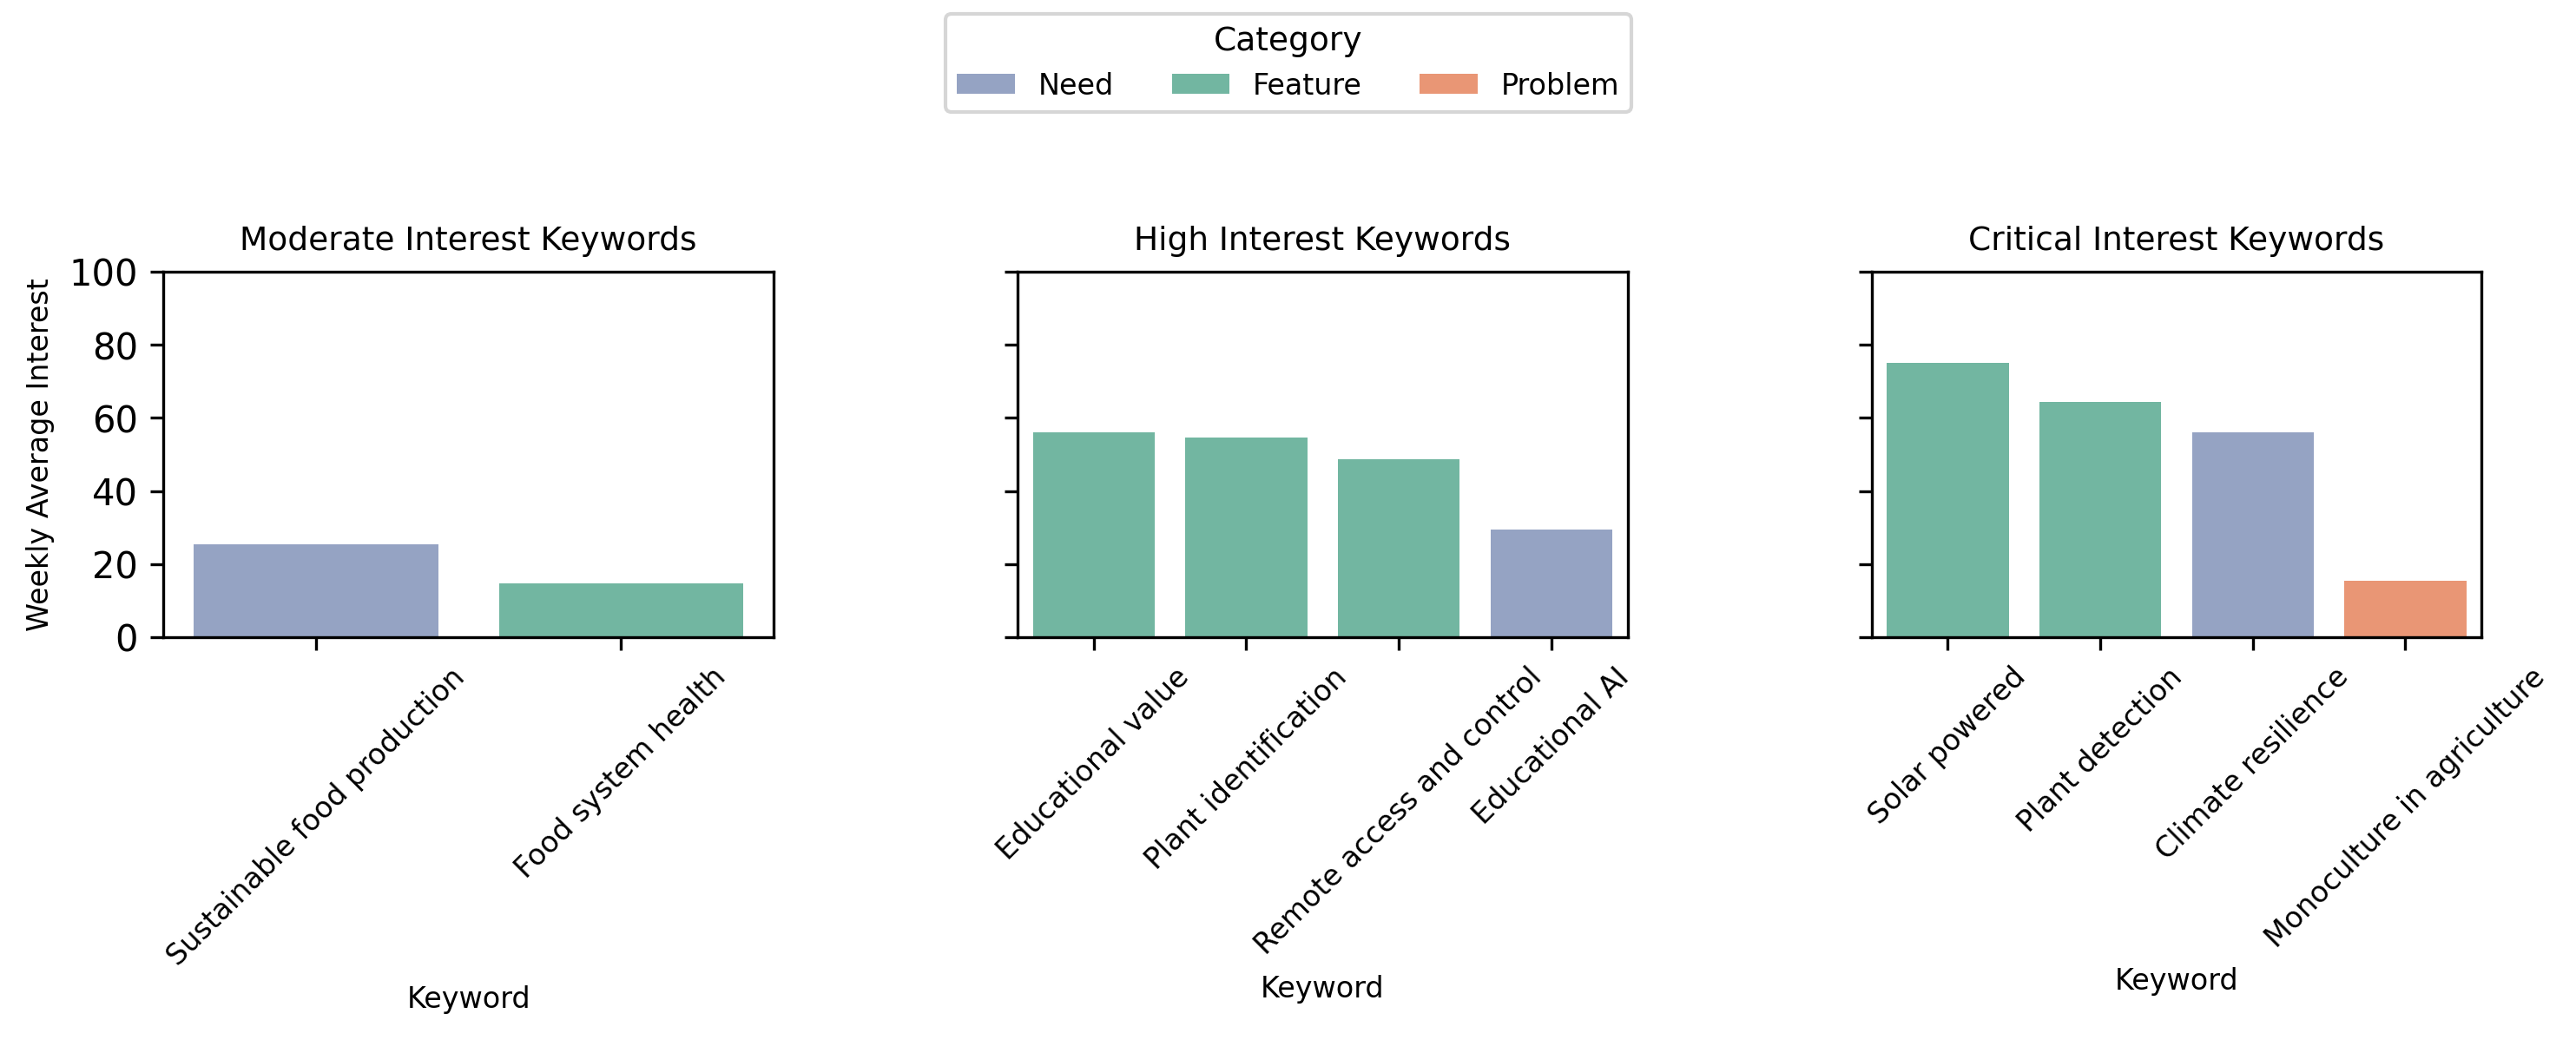

In [ ]:
# Access the Set2 palette
set2_colors = sns.color_palette("Set2")

# Define a custom color palette using Set2 colors
color_palette = {
    'Feature': set2_colors[0],  # orange
    'Problem': set2_colors[1],   # blue
    'Need': set2_colors[2]    # green
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), dpi=300, sharey=True)  # 1 row, 3 columns

# Moderate Interest Keywords Plot
sns.barplot(
    data=moderate_interest_keywords_reset,
    x='index',
    y='weekly_average_interest',
    hue='category',
    palette=color_palette,
    ax=axes[0]  # Specify the first subplot
)
axes[0].set_xlabel('Keyword', fontsize=8)
axes[0].set_ylabel('Weekly Average Interest', fontsize=8)
axes[0].set_title('Moderate Interest Keywords', fontsize=9)
axes[0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0].legend(title='Category', prop={'size': 8}, title_fontsize=9)
axes[0].set_ylim(0, 100)  # Set y-axis limits to ensure a tick at 100

# High Interest Keywords Plot
sns.barplot(
    data=high_interest_keywords_reset,
    x='index',
    y='weekly_average_interest',
    hue='category',
    palette=color_palette,
    ax=axes[1]  # Specify the second subplot
)
axes[1].set_xlabel('Keyword', fontsize=8)
axes[1].set_ylabel('Weekly Average Interest', fontsize=8)
axes[1].set_title('High Interest Keywords', fontsize=9)
axes[1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1].legend(title='Category', prop={'size': 8}, title_fontsize=9)
axes[1].set_ylim(0, 100)  # Set y-axis limits to ensure a tick at 100

# Critical Interest Keywords Plot
sns.barplot(data=critical_interest_keywords_reset,
            x='index',
            y='weekly_average_interest',
            hue='category',
            palette=color_palette,
            ax=axes[2]  # Specify the third subplot
            )
axes[2].set_xlabel('Keyword', fontsize=8)
axes[2].set_ylabel('Weekly Average Interest', fontsize=8)
axes[2].set_title('Critical Interest Keywords', fontsize=9)
axes[2].tick_params(axis='x', labelsize=8, rotation=45)
axes[2].legend(title='Category', prop={'size': 8}, title_fontsize=9)
axes[2].set_ylim(0, 100)  # Set y-axis limits to ensure a tick at 100

# Remove individual legends
for ax in axes:
    ax.get_legend().remove()

# Collect all handles and labels for the legend
handles, labels = [], []
for ax in axes:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

# Create a single legend for the entire figure
fig.legend(handles, labels, loc='upper center', fontsize=8, title='Category', title_fontsize=9, ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.subplots_adjust(top=0.75, wspace=0.4)

plt.show()

**Observation:**
* For the 'Moderate' interest keywords the absolute average interest is between approximately 15 and 25. Absolute interest in the keywords in the *needs* group is slightly higher than in the *feature* keyword.
* For the 'High' interest keywords the absolute average weekly interest is between approximately 25 and 60. All *features* keywords received significantly more interest than the *needs* keyword in this category.
* For the 'Critical' interest features absolute average weekly interest is in a wide range between 25 and 80. This is due to the *problem* with the highest interest having significantly less interest than the keywords in the other groups. The problem remains in this category due to the need to include at least one keyword out of every group for further analysis.

<a name='interest-trends'></a>
### Interest Trend Analysis Results
* Show trends in interest in high performing keywords in the groups *features*, *problems* and *needs*.
* Compare trend analysis results of the three groups.

#### Interest Trends in *features* Keywords
**Insigths:**
1. *Features*
  * **Insights for 'Food system health':**
    * This is the only features in the group with 'moderate' interest
    * Interest is currently low but has been steadily increasing at a low rate of 1.74 units per year.
    * Interest has remained relatively stable over the last three years, with minimal fluctuation between peak and trough values.
    * A seasonal pattern is evident, with interest typically increasing throughout the year and dropping in the summer months.
    * s of June 23, 2024, interest is at a low point of 11 units.
  * **Insights for 'Educational value'**:
    * This proposed feature is classified as a 'high' interest feature.
    * While the interest level is generally high, it does exhibit moderate variability with a standard deviation of 16.
    * This feature consistently receives high interest, with a mean interest of 56 over the past three years and a lowest interest value of 22.
    * Interest has been increasing at a moderate yearly rate of 3.38, although there was a notable dip in 2023.
    * Both the highest and lowest points of interest show an overall upward trend, indicating growing interest in this feature despite the fluctuations.
2. *Problems*
3. *Needs*


**Recommended next steps:**
  1. Customer Segmentation Analysis:
    * Focus on keywords with 'critical' or 'high' interest and prioritize keywords with rapidly rising interest and consistent interest. These are:
    * Educational value: Increasing and continuously high interest with moderate variability.
  2. Prototype Development:
    * It is too early to make a definitive decision on which keywords to include, but some features with especially well results in the trend analysis can be considered prime candidates. These are:
  3. Further Evaluation:
    * Keywords that received moderate interest but show a pattern of rising interest, should be further evaluated, to make a decision whether they should be considered for further analysis and prototype development. Keywords that require further contextual evaluation are:
      * 'Food system health': Low interest but steadily increasing.

**Links to Detailed Analysis:**
* Trend analysis for moderate interest features: [Analysis Moderate Interest Features](#trends-moderate-features)
* Visualizations for moderate interest features: [Visualization Moderate Interest Features](#features-moderate-visualizations)
* Trend analysis for high interest features: [Analysis High Interest Features](#trends-high-features)
* Visualizations for high interest features: [Visualization High Interest Features](#features-high-visualizations)
* Trend analysis for high interest features:
* Trend analysis for critical interest problems:
* Trend analysis for moderate interest needs:  
* Trend analysis for high interest needs:
* Trend analysis for critical interest needs:
* Visualizations for critical interest features:
* Visualizations for high interest problems:
* Visualizations for moderate interest needs:
* Visualizations for high interest needs:
* Visualizations for critical interest needs:

In [ ]:
# Visualize all feature trends in one plot
def create_heatmaps(dfs, interest_levels, categories):
    """
    This function takes multiple DataFrames, resamples the data to a monthly frequency,
    transposes them, and creates a heatmap for each in a subplot.

    Parameters:
    dfs (list of pd.DataFrame): A list of input DataFrames with a date index and keyword columns.
    interest_levels (list of str): A list of interest level descriptions for the heatmap titles.
    categories (list of str): A list of categories for the interest levels ('Features', 'Problems', 'Needs').

    Returns:
    None
    """
    # Check that all input lists have the same length
    if not (len(dfs) == len(interest_levels) == len(categories)):
        raise ValueError("All input lists must have the same length.")

    num_plots = len(dfs)  # Determine the number of plots needed

    # Create subplots with one row per DataFrame
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 2 * num_plots), dpi=400)  # Dynamic height based on number of plots

    # If there's only one plot, ensure axes is iterable
    if num_plots == 1:
        axes = [axes]

    for i in range(num_plots):
        df = dfs[i]
        interest_level = interest_levels[i]
        category = categories[i]

        # Ensure the date column is set as index
        if not isinstance(df.index, pd.DatetimeIndex):
            raise ValueError(f"The DataFrame at index {i} does not have a DatetimeIndex.")

        # Resample the data to a monthly frequency and take the mean
        df_monthly = df.resample('M').mean()

        # Transpose the DataFrame for heatmap
        df_transposed = df_monthly.T

        # Change the column labels to display month and year
        df_transposed.columns = df_transposed.columns.strftime('%b %Y')

        # Create the heatmap in the corresponding subplot
        sns.heatmap(df_transposed, cmap='viridis', cbar=True, vmin=1, vmax=100, ax=axes[i])
        axes[i].set_title(f'Interest in "{interest_level}" Interest {category} Over Time')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Keyword', labelpad=10)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right', fontsize=7)


    # Use subplots_adjust instead of tight_layout
    plt.subplots_adjust(left=0.05, right=0.9, top=1.9, bottom=0, hspace=0.4)  # Increase spacing between plots

    plt.show()


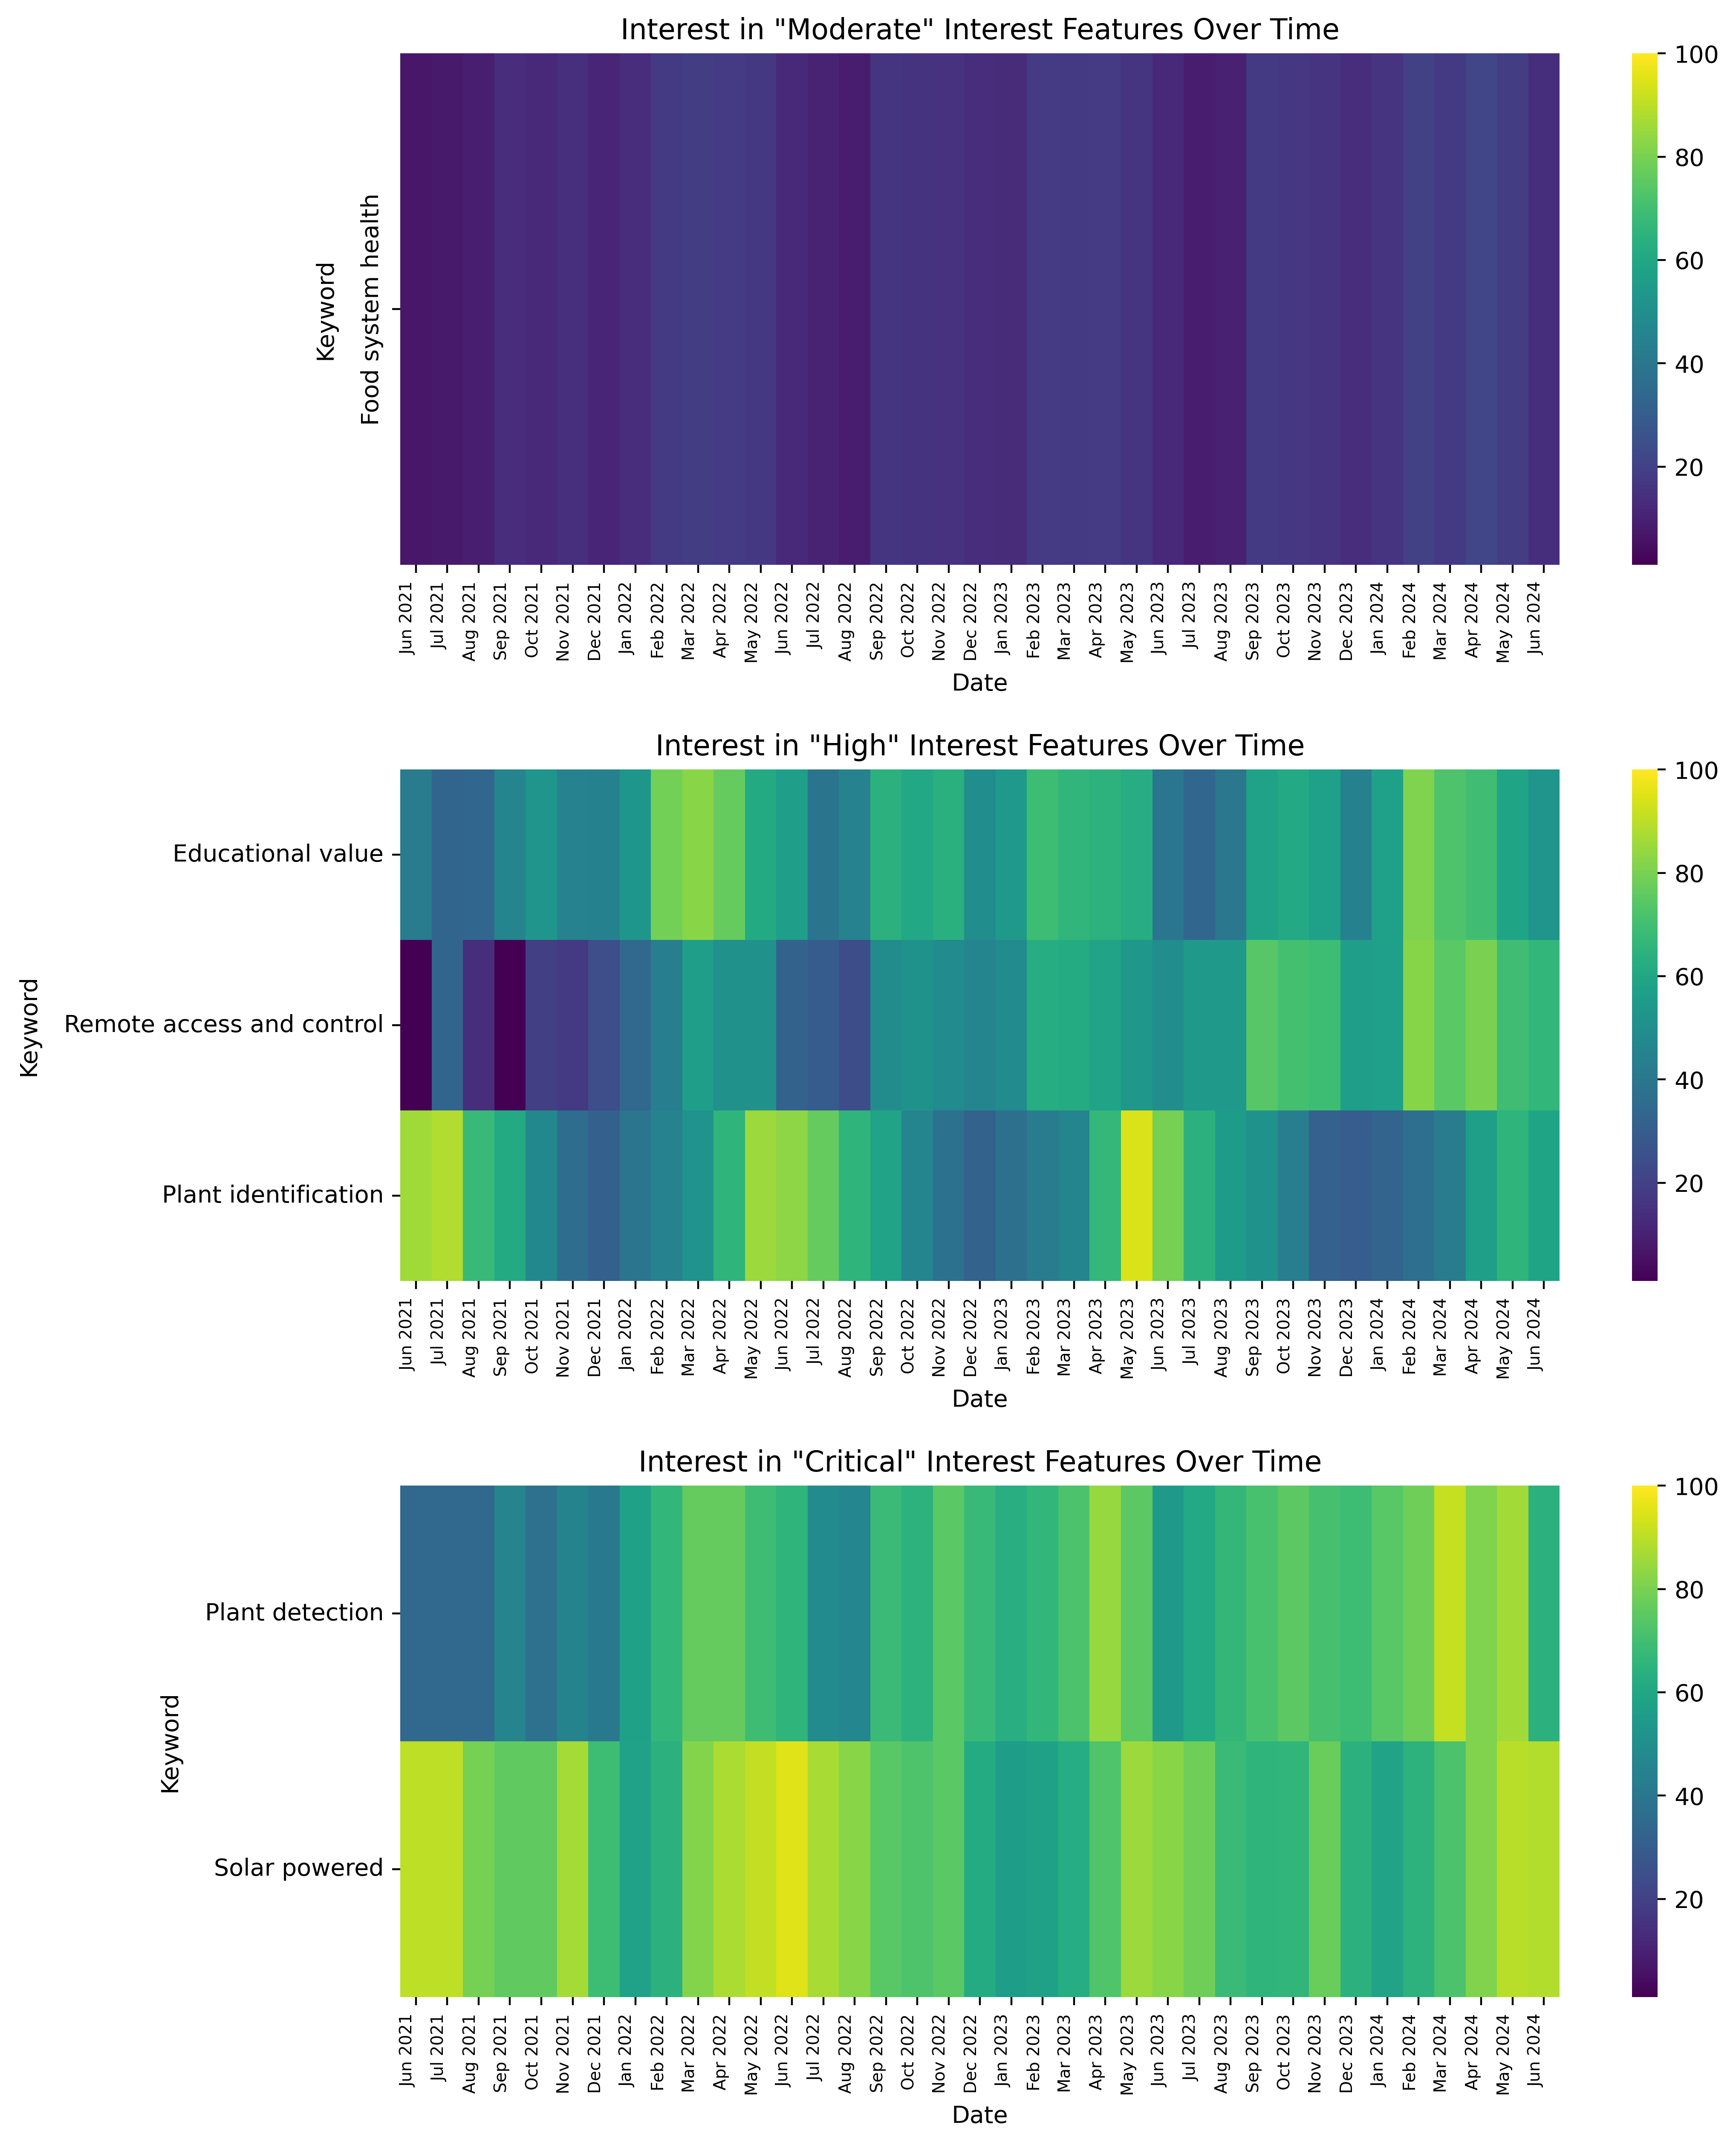

In [625]:
create_heatmaps([moderate_interest_df, high_interest_df, critical_interest_df], ['Moderate', 'High', 'Critical'], ['Features', 'Features', 'Features'])